In [109]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [110]:
pd.options.display.max_columns = 120
loan_df =  pd.read_csv("loan.csv")
data_dic = pd.read_excel("Data_Dictionary.xlsx")

In [111]:
loan_df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Non-Null Count  Dtype  
---   ------                          --------------  -----  
 0    id                              39717 non-null  int64  
 1    member_id                       39717 non-null  int64  
 2    loan_amnt                       39717 non-null  int64  
 3    funded_amnt                     39717 non-null  int64  
 4    funded_amnt_inv                 39717 non-null  float64
 5    term                            39717 non-null  object 
 6    int_rate                        39717 non-null  object 
 7    installment                     39717 non-null  float64
 8    grade                           39717 non-null  object 
 9    sub_grade                       39717 non-null  object 
 10   emp_title                       37258 non-null  object 
 11   emp_length                      38642 non-null  object 
 12   home_ownership  

In [112]:
loan_df.head(1) 

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.0,0.0,5863.155187,5833.84,5000.0,863.16,0.0,0.0,0.0,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [113]:
data_dic.head(1)

,LoanStatNew,Description,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,acc_now_delinq,The number of accounts on which the borrower i...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [114]:
#pd.set_option("max_colwidth", None)
data_dic=data_dic[["LoanStatNew","Description"]]

In [115]:
#pd.set_option('display.max_rows', None)
data_dic.head(2)

,LoanStatNew,Description
0,acc_now_delinq,The number of accounts on which the borrower i...
1,acc_open_past_24mths,Number of trades opened in past 24 months.


# Data Cleaning

### Removing missing data, columns not having any information and formating data 

In [116]:
loan_df['mths_since_last_delinq']=loan_df['mths_since_last_delinq'].fillna("NA")
loan_df["mths_since_last_delinq"].value_counts()

NA       25682
0.0        443
15.0       252
30.0       247
23.0       247
         ...  
97.0         1
106.0        1
107.0        1
115.0        1
120.0        1
Name: mths_since_last_delinq, Length: 96, dtype: int64

In [117]:
loan_df["mths_since_last_record"] = loan_df['mths_since_last_record'].fillna('NA')
loan_df["mths_since_last_record"].value_counts()

NA       36931
0.0        670
104.0       61
89.0        60
113.0       59
         ...  
19.0         1
20.0         1
7.0          1
5.0          1
6.0          1
Name: mths_since_last_record, Length: 112, dtype: int64

In [118]:
loan_df["loan_status"].value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

In [119]:
nan_values = loan_df.isna()
nan_columns = nan_values.any()
columns_with_nan = loan_df.columns[nan_columns].tolist()
columns_with_nan

['emp_title',
 'emp_length',
 'desc',
 'title',
 'revol_util',
 'last_pymnt_d',
 'next_pymnt_d',
 'last_credit_pull_d',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'tot_coll_amt',
 'tot_cur_bal',
 'open_acc_6m',
 'open_il_6m',
 'open_il_12m',
 'open_il_24m',
 'mths_since_rcnt_il',
 'total_bal_il',
 'il_util',
 'open_rv_12m',
 'open_rv_24m',
 'max_bal_bc',
 'all_util',
 'total_rev_hi_lim',
 'inq_fi',
 'total_cu_tl',
 'inq_last_12m',
 'acc_open_past_24mths',
 'avg_cur_bal',
 'bc_open_to_buy',
 'bc_util',
 'chargeoff_within_12_mths',
 'mo_sin_old_il_acct',
 'mo_sin_old_rev_tl_op',
 'mo_sin_rcnt_rev_tl_op',
 'mo_sin_rcnt_tl',
 'mort_acc',
 'mths_since_recent_bc',
 'mths_since_recent_bc_dlq',
 'mths_since_recent_inq',
 'mths_since_recent_revol_delinq',
 'num_accts_ever_120_pd',
 'num_actv_bc_tl',
 'num_actv_rev_tl',
 'num_bc_sats',
 'num_bc_tl',
 'num_il_tl',
 'num_op_rev_tl',
 'num_rev_accts',
 'num_rev_tl

In [120]:
## Function provides list of columns of columns which have more NAN than threshold

def columns_with_missing_data_more_than_threshold(df,threshold):
    rows=df.shape[0]
    res_cols=[]
    nan_values = loan_df.isna()
    for col in nan_values:
        nan_row_count=loan_df[col].isna().sum()
        if (nan_row_count/rows)>threshold:
            res_cols.append(col)
    return res_cols
    

In [121]:
## remove missing data in columns if missing more than 99%
colums_to_drop = columns_with_missing_data_more_than_threshold(loan_df,0.99)

loan_df.drop(colums_to_drop, axis = 1, inplace=True)

nan_values = loan_df.isna()
nan_columns = nan_values.any()
columns_with_nan = loan_df.columns[nan_columns].tolist()
columns_with_nan

['emp_title',
 'emp_length',
 'desc',
 'title',
 'revol_util',
 'last_pymnt_d',
 'next_pymnt_d',
 'last_credit_pull_d',
 'collections_12_mths_ex_med',
 'chargeoff_within_12_mths',
 'pub_rec_bankruptcies',
 'tax_liens']

In [122]:
loan_df = loan_df[loan_df['revol_util'].notna()]

### Removing Income Outliers from Data, column annual_income

<AxesSubplot:xlabel='annual_inc'>

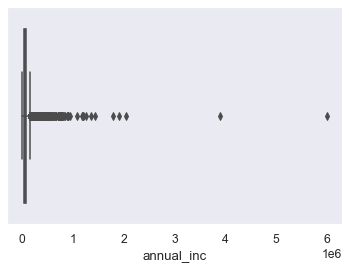

In [123]:
loan_df = loan_df[loan_df['revol_util'].notna()]

loan_df["annual_inc"].describe()

loan_df["annual_inc"].median()

sns.boxplot(loan_df["annual_inc"])

#annual_inc has a lot of outliers towards max side

<AxesSubplot:xlabel='annual_inc'>

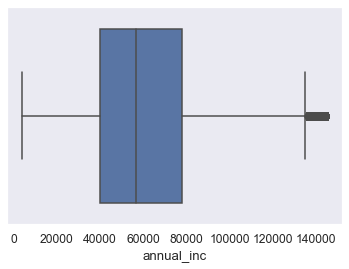

In [124]:
Q3=loan_df["annual_inc"].quantile(0.75)
Q1=loan_df["annual_inc"].quantile(0.25)
limit = Q3+1.5*(Q3-Q1)
loan_df=loan_df[loan_df["annual_inc"]<limit]
sns.boxplot(loan_df["annual_inc"])

In [125]:
loan_df["tax_liens"].value_counts() 
# No info in Column

0.0    37794
Name: tax_liens, dtype: int64

In [126]:
loan_df["chargeoff_within_12_mths"].value_counts()   
# Remove Column no info

0.0    37779
Name: chargeoff_within_12_mths, dtype: int64

In [127]:
loan_df["next_pymnt_d"].value_counts() 
# Remove column, only valid for current loans

Jun-16    1042
Jul-16      15
Name: next_pymnt_d, dtype: int64

In [128]:
loan_df["title"].value_counts()
# Most values are either debt consolidation and credit card with many other values, Purpose col is better 
# to comprehend.


Debt Consolidation               2077
Debt Consolidation Loan          1638
Personal Loan                     631
debt consolidation                483
Consolidation                     480
                                 ... 
Stop paying interest to Chase       1
My Family Emergency Loan            1
payoff bank of america              1
I need a personal loan              1
ATV laon                            1
Name: title, Length: 18812, dtype: int64

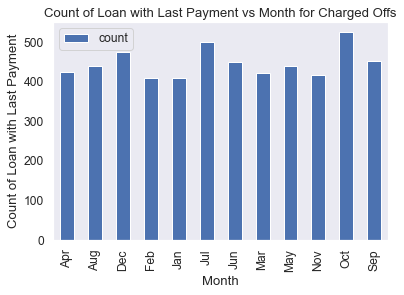

In [129]:
## if the pattern is consist across 3 labels of loan_status then col is not useful

charged_off_df=loan_df[loan_df["loan_status"]=="Charged Off"]
charged_off_df["last_pymnt_d"].value_counts() 
co_mnth_label = charged_off_df[["last_pymnt_d","loan_status"]]
co_mnth_label.dropna(inplace=True)
co_mnth_label["last_pymnt_d"] = co_mnth_label["last_pymnt_d"].apply(lambda x:x[:3])
pd_sf = co_mnth_label["last_pymnt_d"].value_counts()
co_mnth_df=pd.DataFrame({'month':pd_sf.index, 'count':pd_sf.values}) 

co_mnth_df=co_mnth_df.sort_values('month')
co_mnth_df.set_index(["month"]).plot.bar()


plt.xlabel("Month")
plt.ylabel("Count of Loan with Last Payment")
plt.title("Count of Loan with Last Payment vs Month for Charged Offs")
plt.show()

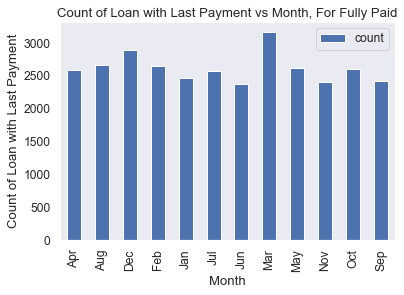

In [130]:
fully_paid_df=loan_df[loan_df["loan_status"]=="Fully Paid"]

ln_mnth = fully_paid_df[["last_pymnt_d"]]
ln_mnth.dropna(inplace=True)
ln_mnth["last_pymnt_d"] = ln_mnth["last_pymnt_d"].apply(lambda x:x[:3])
pd_sf = ln_mnth["last_pymnt_d"].value_counts()
ln_mnth_df=pd.DataFrame({'month':pd_sf.index, 'count':pd_sf.values}) 
ln_mnth_df=ln_mnth_df.sort_values('month')
ln_mnth_df.set_index(["month"]).plot.bar()


plt.xlabel("Month")
plt.ylabel("Count of Loan with Last Payment")
plt.title("Count of Loan with Last Payment vs Month, For Fully Paid")
plt.show()


In [131]:
to_remove_cols=["last_credit_pull_d",
                "next_pymnt_d",
                "desc",
                "tax_liens",
                "desc",
                "chargeoff_within_12_mths",
                "collections_12_mths_ex_med",
                "emp_title",
                "last_pymnt_d",
               "mths_since_last_delinq",
               "mths_since_last_record"]

In [132]:
loan_df.drop(to_remove_cols, axis = 1, inplace=True)

In [133]:
loan_df = loan_df.drop_duplicates(keep='last')
loan_df.shape

(37825, 47)

In [134]:
loan_df.head(2)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,policy_code,application_type,acc_now_delinq,delinq_amnt,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.70%,9,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.0,0.00,0.00,171.62,1,INDIVIDUAL,0,0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.0,117.08,1.11,119.66,1,INDIVIDUAL,0,0,0.0


In [135]:
to_rm_cols=["member_id","url"]
loan_df.drop(to_rm_cols, axis = 1, inplace=True)

In [136]:
charged_off_df["pymnt_plan"].value_counts()

n    5415
Name: pymnt_plan, dtype: int64

In [137]:
loan_df["application_type"].value_counts()

INDIVIDUAL    37825
Name: application_type, dtype: int64

In [138]:
# drop pymnt_plan (all are n), application_type ( all are INDIVIDUAL)
to_rm_cols=["pymnt_plan","application_type"]
ln=loan_df.drop(to_rm_cols, axis=1)

In [139]:
loan_df["policy_code"].value_counts()
loan_df["delinq_amnt"].value_counts()
loan_df["acc_now_delinq"].value_counts()

0    37825
Name: acc_now_delinq, dtype: int64

In [140]:
to_rm_cols=["acc_now_delinq","delinq_amnt","policy_code"]
loan_df.drop(to_rm_cols, axis = 1, inplace=True)


In [141]:
loan_df["int_rate"]=loan_df["int_rate"].apply(lambda x: float(x.replace("%","")))

In [142]:
loan_df["term"]=loan_df["term"].apply(lambda x:int(x.replace("months","")))

In [143]:
loan_df["revol_util"]=loan_df["revol_util"].apply(lambda x: float(x.replace("%","")))

<AxesSubplot:>

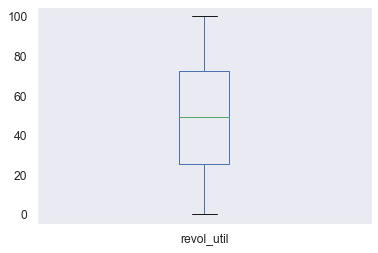

In [144]:
loan_df["revol_util"].plot.box()

# revol_util is better param for revolving utilzation of money

## Binning Columns and forming Derived Columns from existing

In [145]:
loan_df["issue_m"]=loan_df["issue_d"].apply(lambda x: x[:3])

In [146]:
loan_df["issue_y"]=loan_df["issue_d"].apply(lambda x: int(x[-2:]))

In [147]:
loan_df['funded_amnt'].describe()  

count    37825.000000
mean     10622.059484
std       6915.936119
min        500.000000
25%       5000.000000
50%       9300.000000
75%      14725.000000
max      35000.000000
Name: funded_amnt, dtype: float64

In [148]:
loan_df['funded_amnt_bins'] = pd.cut(loan_df['funded_amnt'], [0, 5000, 10000, 15000, 20000, 25000, 30000,350001], labels=['0-5000', '5000-10000', '10000-15000', '15000-20000', '20000-25000','25000-30000','30000+'])


In [149]:
loan_df['int_rate'].describe()

count    37825.000000
mean        11.969317
std          3.697773
min          5.420000
25%          8.940000
50%         11.830000
75%         14.460000
max         24.400000
Name: int_rate, dtype: float64

In [150]:
loan_df['int_rate_bins'] = pd.cut(loan_df['int_rate'], [5, 10,12, 15, 20,25], labels=['5-10', '10-12','12-15', '15-20', '20-25'])
loan_df['int_rate_bins'].value_counts()

5-10     11943
12-15     9759
10-12     8175
15-20     7187
20-25      761
Name: int_rate_bins, dtype: int64

In [151]:
loan_df['annual_inc'].describe()

count     37825.000000
mean      61392.184417
std       28198.814333
min        4000.000000
25%       40000.000000
50%       56400.000000
75%       78000.000000
max      145008.000000
Name: annual_inc, dtype: float64

In [152]:
loan_df['annual_inc_bins'] = pd.cut(loan_df['annual_inc'], [3000, 20000, 40000, 60000, 80000,100000,150000], labels=['3000-20000', '20000-40000', '40000-60000', '60000-80000', '80000-10000','100000+'])


In [153]:
loan_df['annual_inc_bins'].value_counts()

40000-60000    11598
20000-40000     8668
60000-80000     7859
80000-10000     4683
100000+         3842
3000-20000      1175
Name: annual_inc_bins, dtype: int64

In [154]:
loan_df['dti'].describe()

count    37825.000000
mean        13.487586
std          6.665234
min          0.000000
25%          8.390000
50%         13.620000
75%         18.760000
max         29.990000
Name: dti, dtype: float64

In [155]:
loan_df['dti_bins'] = pd.cut(loan_df['dti'], bins=[0, 5, 10, 15, 20, 30], labels=['0-5', '5-10', '10-15', '15-20', '20+'])


In [156]:
loan_df['dti_bins'].value_counts()


10-15    9448
15-20    8821
5-10     7468
20+      7368
0-5      4552
Name: dti_bins, dtype: int64

In [157]:
loan_df['revol_util'].describe()
loan_df['revol_util_bins'] = pd.cut(loan_df['revol_util'], [-1, 10, 20, 30, 40, 50,60,70,80,90,100], labels=['0-10', '10-20', '20-30', '30-40', '40-50','50-60','60-70','70-80','80-90','90-100'])
loan_df['revol_util_bins'].value_counts()

0-10      4277
40-50     4155
50-60     4144
60-70     4069
30-40     3956
70-80     3832
20-30     3663
80-90     3512
10-20     3238
90-100    2979
Name: revol_util_bins, dtype: int64

In [158]:
# for running sum in pivot
loan_df["count"]=1

 # Univariate Analysis

### Loan Status

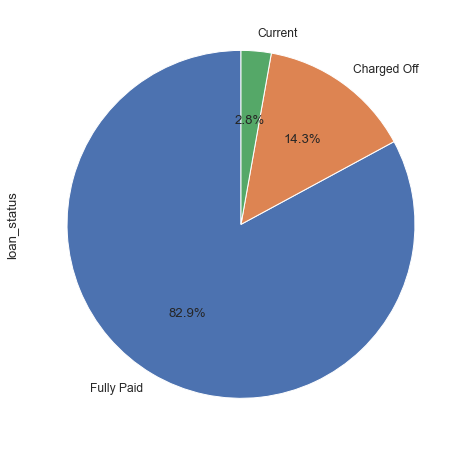

In [159]:
plt.figure(figsize=(12,8))
loan_df["loan_status"].value_counts().plot.pie(startangle=90, autopct='%1.1f%%')
plt.show()

### Column funded_amnt_bins, funded_amnt, loan_amnt

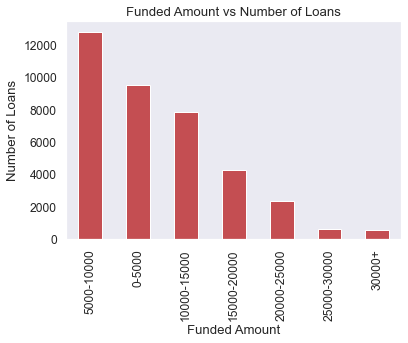

In [160]:

loan_df["funded_amnt_bins"].value_counts().plot.bar(color=['r'])
plt.xlabel("Funded Amount")
plt.ylabel("Number of Loans")
plt.title("Funded Amount vs Number of Loans")
plt.show()

#Most loans taken between 0-15000

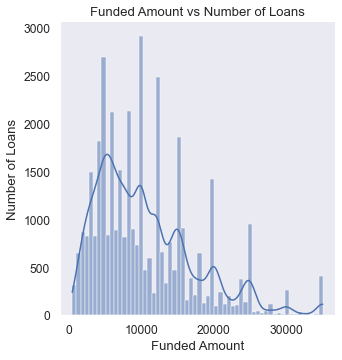

In [161]:
sns.displot(loan_df["funded_amnt"],kde=True)
plt.xlabel("Funded Amount")
plt.ylabel("Number of Loans")
plt.title("Funded Amount vs Number of Loans")
plt.show()

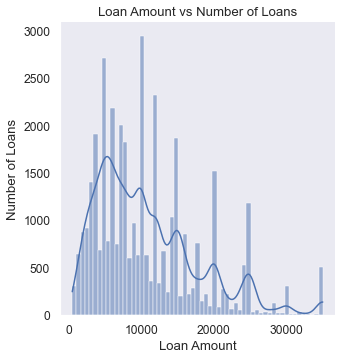

In [162]:
sns.displot(loan_df["loan_amnt"],kde=True)

plt.xlabel("Loan Amount")
plt.ylabel("Number of Loans")
plt.title("Loan Amount vs Number of Loans")
plt.show()

<AxesSubplot:xlabel='funded_amnt'>

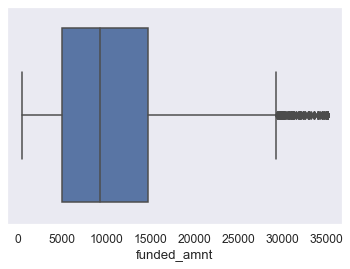

In [163]:

sns.boxplot(loan_df["funded_amnt"])

### Purpose

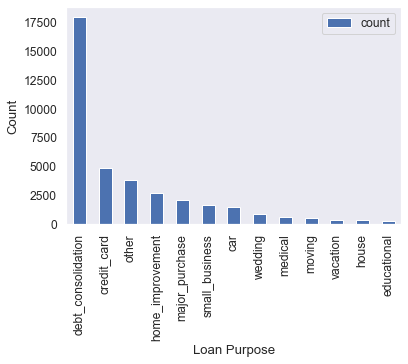

In [164]:

title_sf=loan_df["purpose"].value_counts()
title_df=pd.DataFrame({'title':title_sf.index, 'count':title_sf.values}) 
ttl=title_df.set_index(["title"])
ttl[ttl["count"]>100].plot.bar()
plt.xlabel("Loan Purpose")
plt.ylabel("Count")
plt.show()

### Issue Year

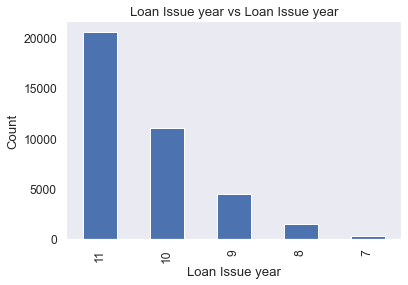

In [165]:
loan_df["issue_y"].value_counts().plot.bar()

plt.xlabel("Loan Issue year")
plt.ylabel("Count")
plt.title("Loan Issue year vs Loan Issue year")
plt.show()

## number of loans are increasing everywhere year


### revol_util

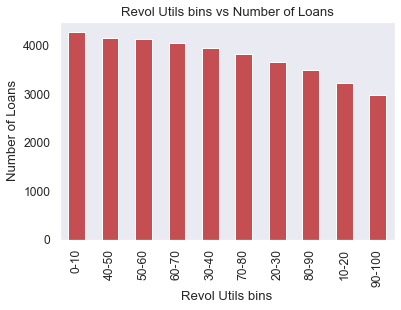

In [166]:
loan_df["revol_util_bins"].value_counts().plot.bar(color=['r'])
plt.xlabel("Revol Utils bins")
plt.ylabel("Number of Loans")
plt.title("Revol Utils bins vs Number of Loans")
plt.show()
plt.show()
# Revol_Util is consistently decreasing 

### int_rate

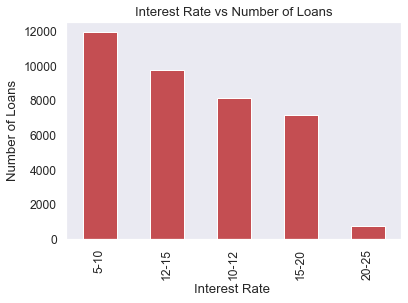

11.83

In [167]:
loan_df["int_rate_bins"].value_counts().plot.bar(color=['r'])
plt.xlabel("Interest Rate ")
plt.ylabel("Number of Loans")
plt.title("Interest Rate vs Number of Loans")
plt.show()
loan_df["int_rate"].median()
## Median interest rate lies between 10-12%, but majority of applicants get interest rate less than 5%

<AxesSubplot:xlabel='int_rate'>

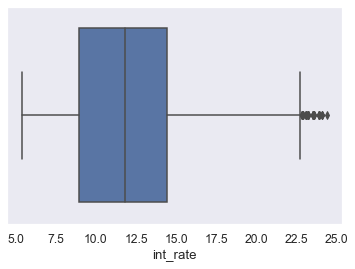

In [168]:
sns.boxplot(x=loan_df["int_rate"])

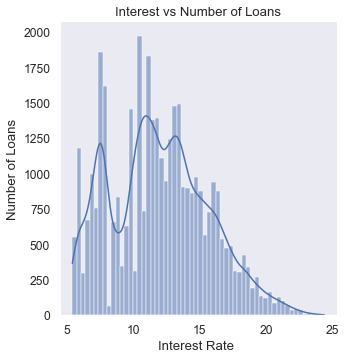

In [169]:
sns.displot(loan_df["int_rate"],kde=True)
plt.title("Interest vs Number of Loans")
plt.xlabel("Interest Rate ")
plt.ylabel("Number of Loans")
plt.show()

### annual_inc  

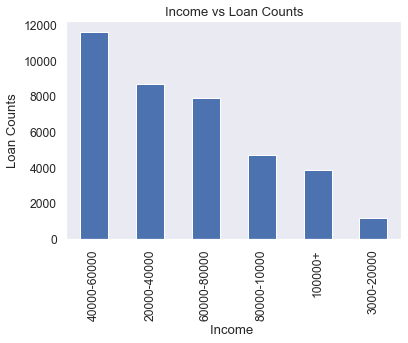

In [170]:
loan_df["annual_inc_bins"].value_counts().plot.bar()

plt.xlabel("Income ")
plt.ylabel("Loan Counts")
plt.title("Income vs Loan Counts")
plt.show()

### DTI 

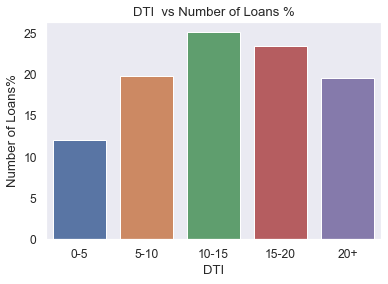

,dti_bins,id,count%
0,0-5,4552,12.088058
1,5-10,7468,19.831638
2,10-15,9448,25.089625
3,15-20,8821,23.424596
4,20+,7368,19.566083


In [171]:

dti_df=loan_df.groupby(by=["dti_bins"])[["id"]].count()
sm=dti_df["id"].sum()
dti_df["count%"]=(dti_df["id"]*100)/sm
dti_df.reset_index(inplace=True)
sns.barplot(data=dti_df, x="dti_bins", y="count%")

plt.title("DTI  vs Number of Loans %")
plt.xlabel("DTI")
plt.ylabel("Number of Loans%")
plt.show()
dti_df
## Majority dti lies 10-20 for all loans

## Segmented Univariate Analaysis

In [172]:
ann_inc_df=loan_df.groupby(by=["loan_status"])[["loan_amnt","int_rate","annual_inc","dti","delinq_2yrs","inq_last_6mths","pub_rec","revol_util"]].mean()

ann_inc_df

## revol_util, pub_rec, dti, inq_last_6mths are higher and annual_inc is lower for charged Off compared to fully paid

,loan_amnt,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,pub_rec,revol_util
loan_status,,,,,,,,
Charged Off,11851.472761,13.755636,56721.264286,14.107232,0.168421,1.056879,0.086611,55.366864
Current,16524.290445,14.904068,66142.200776,15.099763,0.136235,0.784295,0.042573,52.822337
Fully Paid,10518.429656,11.561862,62038.765771,13.326215,0.141167,0.831117,0.051542,47.510561


In [173]:
grd_df=loan_df.groupby(by=["grade"])[["loan_amnt","int_rate","annual_inc","dti","delinq_2yrs","inq_last_6mths","pub_rec","revol_util"]].mean()
grd_df

# DTI falls for grade G
# grade might be dependent on factors of revol_util, loan_amount, int_rate and dti; might be irrespective of annual_inc

,loan_amnt,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,pub_rec,revol_util
grade,,,,,,,,
A,8459.327437,7.332440,60802.512021,12.218039,0.044838,0.671740,0.015117,29.858304
B,10793.606779,11.018561,60469.407697,13.624677,0.115797,0.784526,0.055415,46.528415
C,10702.531973,13.551807,59889.630634,14.056813,0.186798,1.076993,0.079189,56.532111
D,11964.359279,15.715968,61426.366704,14.110489,0.243018,0.982769,0.080412,63.096116
E,15273.689246,17.678791,66518.788986,14.329805,0.234979,0.965174,0.081515,67.828385
F,17626.008493,19.721072,71751.094660,14.420382,0.325902,1.040340,0.096603,70.432272
G,19782.437276,21.334588,77985.209713,13.992366,0.440860,0.978495,0.086022,75.715054


In [174]:
emp_len_df=loan_df.groupby(by=["emp_length"])[["loan_amnt","int_rate","annual_inc","dti","delinq_2yrs","inq_last_6mths","pub_rec","revol_util"]].mean()
emp_len_df

# Does not reflect any useful info.

,loan_amnt,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,pub_rec,revol_util
emp_length,,,,,,,,
1 year,9894.874880,12.031771,56536.524735,13.196827,0.166185,0.886750,0.035611,48.422214
10+ years,12690.588803,12.029831,70755.889453,13.976647,0.163610,0.888634,0.077341,49.466173
2 years,9883.711941,12.037191,56462.480117,13.265442,0.147479,0.844196,0.041865,48.741912
3 years,10399.814768,11.978222,59500.692108,13.315434,0.138222,0.833163,0.046500,48.163807
4 years,10719.805884,12.115648,60747.334917,13.338972,0.133455,0.815590,0.044889,49.519500
5 years,10988.030642,11.989927,61202.885717,13.615445,0.116821,0.836898,0.052665,48.344746
6 years,11201.978923,11.989059,62146.499705,13.971190,0.126464,0.876815,0.061827,49.534585
7 years,11405.170388,12.122515,62846.315464,13.819583,0.148649,0.857227,0.068743,49.749788
8 years,11414.917027,11.831818,64639.293290,14.083146,0.166667,0.865079,0.064214,48.671082


In [175]:
ver_df=loan_df.groupby(by=["verification_status"])[["loan_amnt","int_rate","annual_inc","dti","delinq_2yrs","inq_last_6mths","pub_rec","revol_util"]].mean()
ver_df

# verified income sources get higher loan_amount
# There consistent increase in annual_inc and revol_util in order of verification


,loan_amnt,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,pub_rec,revol_util
verification_status,,,,,,,,
Not Verified,8323.289641,11.183789,56634.488652,13.118058,0.140643,0.854392,0.059151,46.831354
Source Verified,9679.798753,12.053971,59280.454384,12.831294,0.150222,0.847243,0.053349,49.541534
Verified,15396.172522,12.997288,69716.158190,14.527609,0.146681,0.884817,0.054720,50.901011


In [176]:
pur_df=loan_df.groupby(by=["purpose"])[["loan_amnt","int_rate","annual_inc","dti","delinq_2yrs","inq_last_6mths","pub_rec","revol_util"]].mean()
pur_df

# revol_util is high for credit_card and debt_consolidation
# dti is highest for credit_card

,loan_amnt,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,pub_rec,revol_util
purpose,,,,,,,,
car,6673.553856,10.556715,58230.673949,11.223617,0.152261,0.886968,0.057846,36.475426
credit_card,11429.654961,11.654659,63942.767987,14.767068,0.102899,0.738669,0.056145,56.592093
debt_consolidation,12394.454987,12.434342,61250.055211,14.631534,0.132500,0.818887,0.057766,53.946651
educational,6636.774194,11.621065,48108.724452,11.257129,0.158065,1.125806,0.041935,38.188710
home_improvement,10732.243517,11.267260,70694.101360,11.455588,0.175498,1.092446,0.066516,36.432976
house,12215.857143,12.139800,63046.423314,10.934457,0.148571,1.448571,0.051429,35.159714
major_purchase,7863.045564,10.816628,58141.664034,10.946671,0.168345,0.840767,0.042686,35.373669
medical,7919.375963,11.484438,58610.355300,12.313606,0.212635,0.922958,0.092450,41.988028
moving,6123.243243,11.509712,54384.856198,11.881964,0.158559,0.890090,0.046847,44.757297


In [177]:

hm_own_df=loan_df.groupby(by=["home_ownership"])[["loan_amnt","int_rate","annual_inc","dti","delinq_2yrs","inq_last_6mths","pub_rec","revol_util"]].mean()
hm_own_df

# revol_util is high for people on rent

,loan_amnt,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,pub_rec,revol_util
home_ownership,,,,,,,,
MORTGAGE,12207.721465,11.675998,71827.888575,13.396823,0.152167,0.947301,0.065232,46.446979
NONE,5600.000000,8.696667,80733.333333,11.746667,0.000000,0.666667,0.000000,12.833333
OTHER,10570.054945,12.063297,60311.604396,11.720659,0.329670,1.076923,0.032967,43.626374
OWN,9964.998298,11.757331,52459.071399,13.452915,0.154920,0.888321,0.051753,43.925822
RENT,9844.261539,12.263383,53559.025516,13.582637,0.136031,0.781364,0.049249,51.661959


Text(0.5, 1.0, 'revol_util')

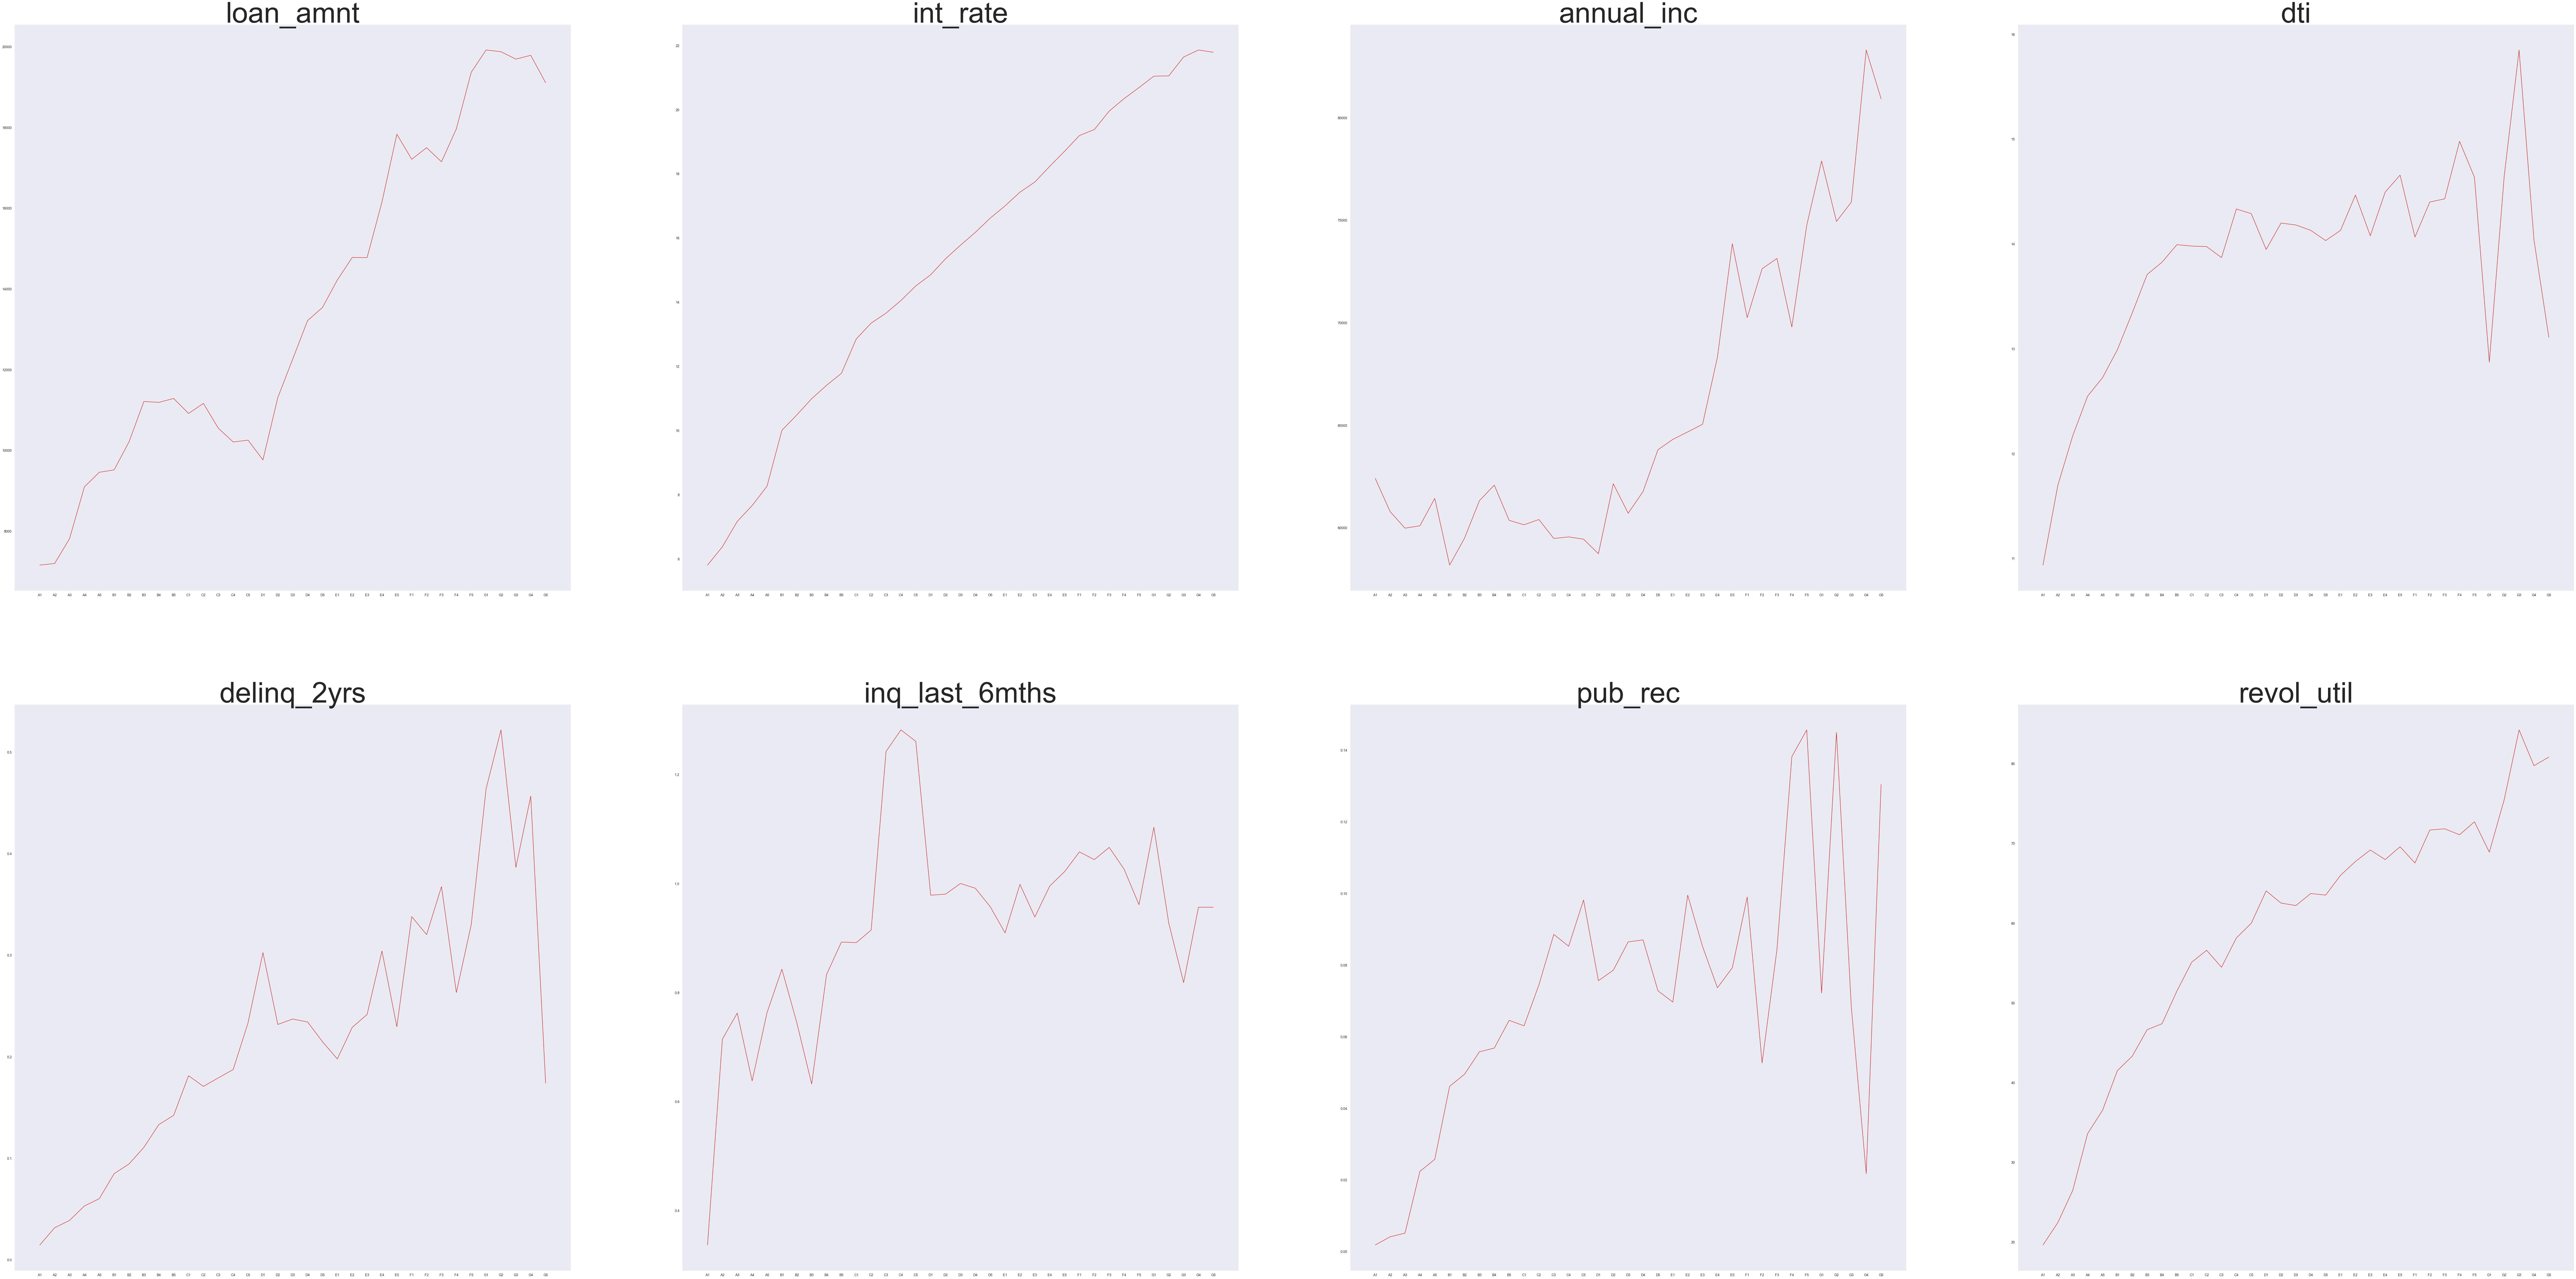

In [178]:
sub_grd_df=loan_df.groupby(by=["sub_grade"])[["loan_amnt","int_rate","annual_inc","dti","delinq_2yrs","inq_last_6mths","pub_rec","revol_util"]].mean()
sub_grd_df.reset_index(inplace=True)
fig, ax = plt.subplots(2,4,figsize=(160,80))

ax[0,0].plot(sub_grd_df["sub_grade"],sub_grd_df["loan_amnt"],'tab:red')
ax[0,0].set_title('loan_amnt',fontsize=100)
ax[0,1].plot(sub_grd_df["sub_grade"],sub_grd_df["int_rate"],'tab:red')
ax[0,1].set_title('int_rate',fontsize=100)
ax[0,2].plot(sub_grd_df["sub_grade"],sub_grd_df["annual_inc"],'tab:red')
ax[0,2].set_title('annual_inc',fontsize=100)
ax[0,3].plot(sub_grd_df["sub_grade"],sub_grd_df["dti"],'tab:red')
ax[0,3].set_title('dti',fontsize=100)
ax[1,0].plot(sub_grd_df["sub_grade"],sub_grd_df["delinq_2yrs"],'tab:red')
ax[1,0].set_title('delinq_2yrs',fontsize=100)
ax[1,1].plot(sub_grd_df["sub_grade"],sub_grd_df["inq_last_6mths"],'tab:red')
ax[1,1].set_title('inq_last_6mths',fontsize=100)
ax[1,2].plot(sub_grd_df["sub_grade"],sub_grd_df["pub_rec"],'tab:red')
ax[1,2].set_title('pub_rec',fontsize=100)
ax[1,3].plot(sub_grd_df["sub_grade"],sub_grd_df["revol_util"],'tab:red')
ax[1,3].set_title('revol_util',fontsize=100)



# loan_amount, int_rate, revol_util increase almost consistently with grade


# Bivariate Analysis
### Purpose

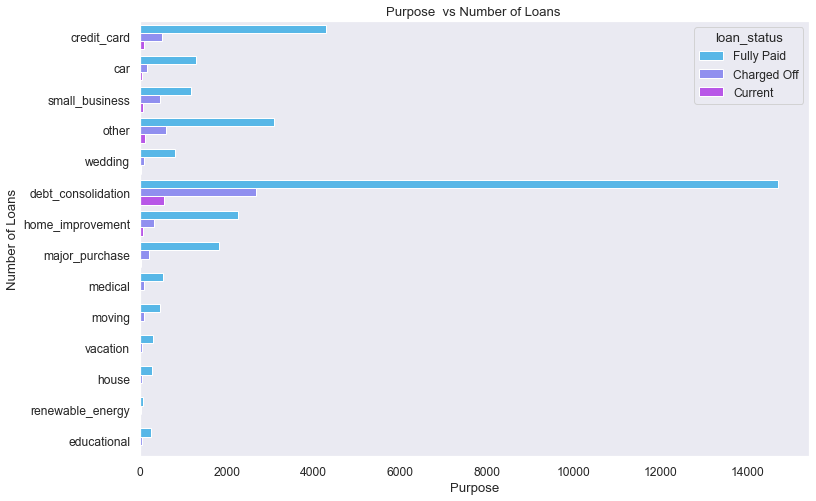

In [179]:
plt.figure(figsize=(12,8))
sns.set_style("dark")

sns.countplot(y="purpose",data=loan_df,hue='loan_status',palette='cool')
plt.title("Purpose  vs Number of Loans ")
plt.xlabel("Purpose")
plt.ylabel("Number of Loans")
plt.show()

## Most loans are for debt_Consolidation and credit card and same goes for charged offs

### Addr_state

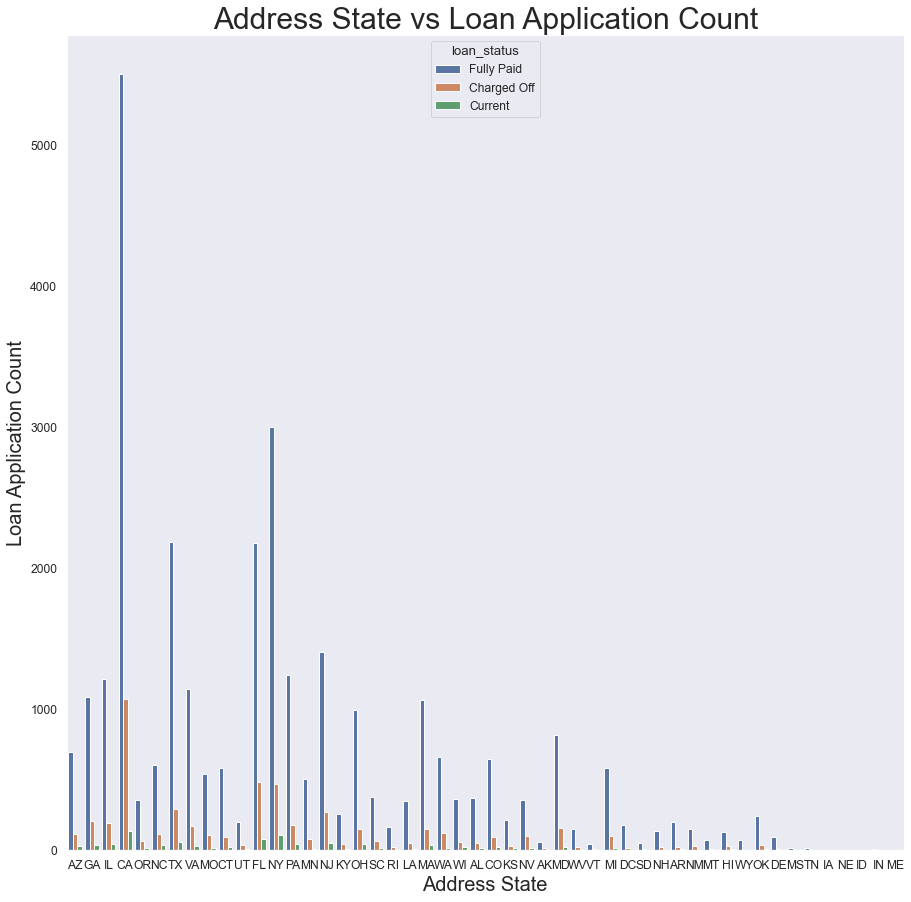

In [180]:
plt.figure(figsize=(15,15))
ax =sns.countplot(x="addr_state",data=loan_df,hue='loan_status')
ax.set_title('Address State vs Loan Application Count',fontsize=30)
ax.set_xlabel('Address State',fontsize=20)
ax.set_ylabel('Loan Application Count',fontsize=20)      
plt.show()

# Charged follows similar trend with fully paid being in direct proportion,
# Cities/States CA, NJ, NY, TX, FL shows max loans

### Term

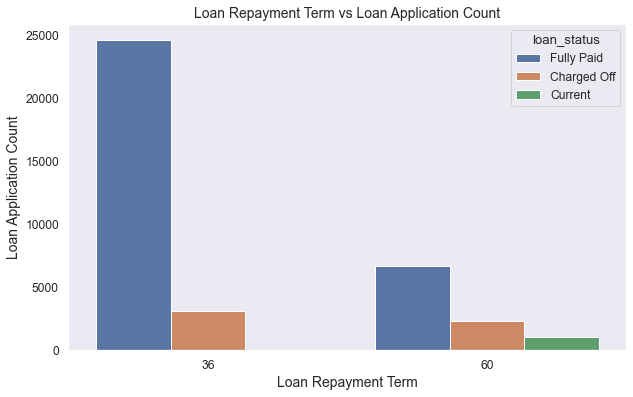

,loan_status,count,Percentage
0,Charged Off,2308,23.004087
1,Current,1057,10.535234
2,Fully Paid,6668,66.460680


In [181]:

plt.figure(figsize=(10,6),facecolor='w')
ax =sns.countplot(x="term",data=loan_df,hue='loan_status')
ax.set_title('Loan Repayment Term vs Loan Application Count',fontsize=14)
ax.set_xlabel('Loan Repayment Term',fontsize=14)
ax.set_ylabel('Loan Application Count',fontsize=14)      
plt.show()

term_60_grp=loan_df[loan_df["term"]==60].groupby(by=["loan_status"])[["count"]].sum()
term_60_grp.reset_index(inplace=True)
term_60_grp["Percentage"]=term_60_grp["count"]*100/term_60_grp["count"].sum()
term_60_grp

# Term of 60 months has higher charged Off than 36 months

In [182]:
term_36_grp=loan_df[loan_df["term"]==36].groupby(by=["loan_status"])[["count"]].sum()
term_36_grp.reset_index(inplace=True)
term_36_grp["Percentage"]=term_36_grp["count"]*100/term_36_grp["count"].sum()
term_36_grp

## near to 12% higher charged off for 60 months group

,loan_status,count,Percentage
0,Charged Off,3107,11.179476
1,Fully Paid,24685,88.820524


### issue_d

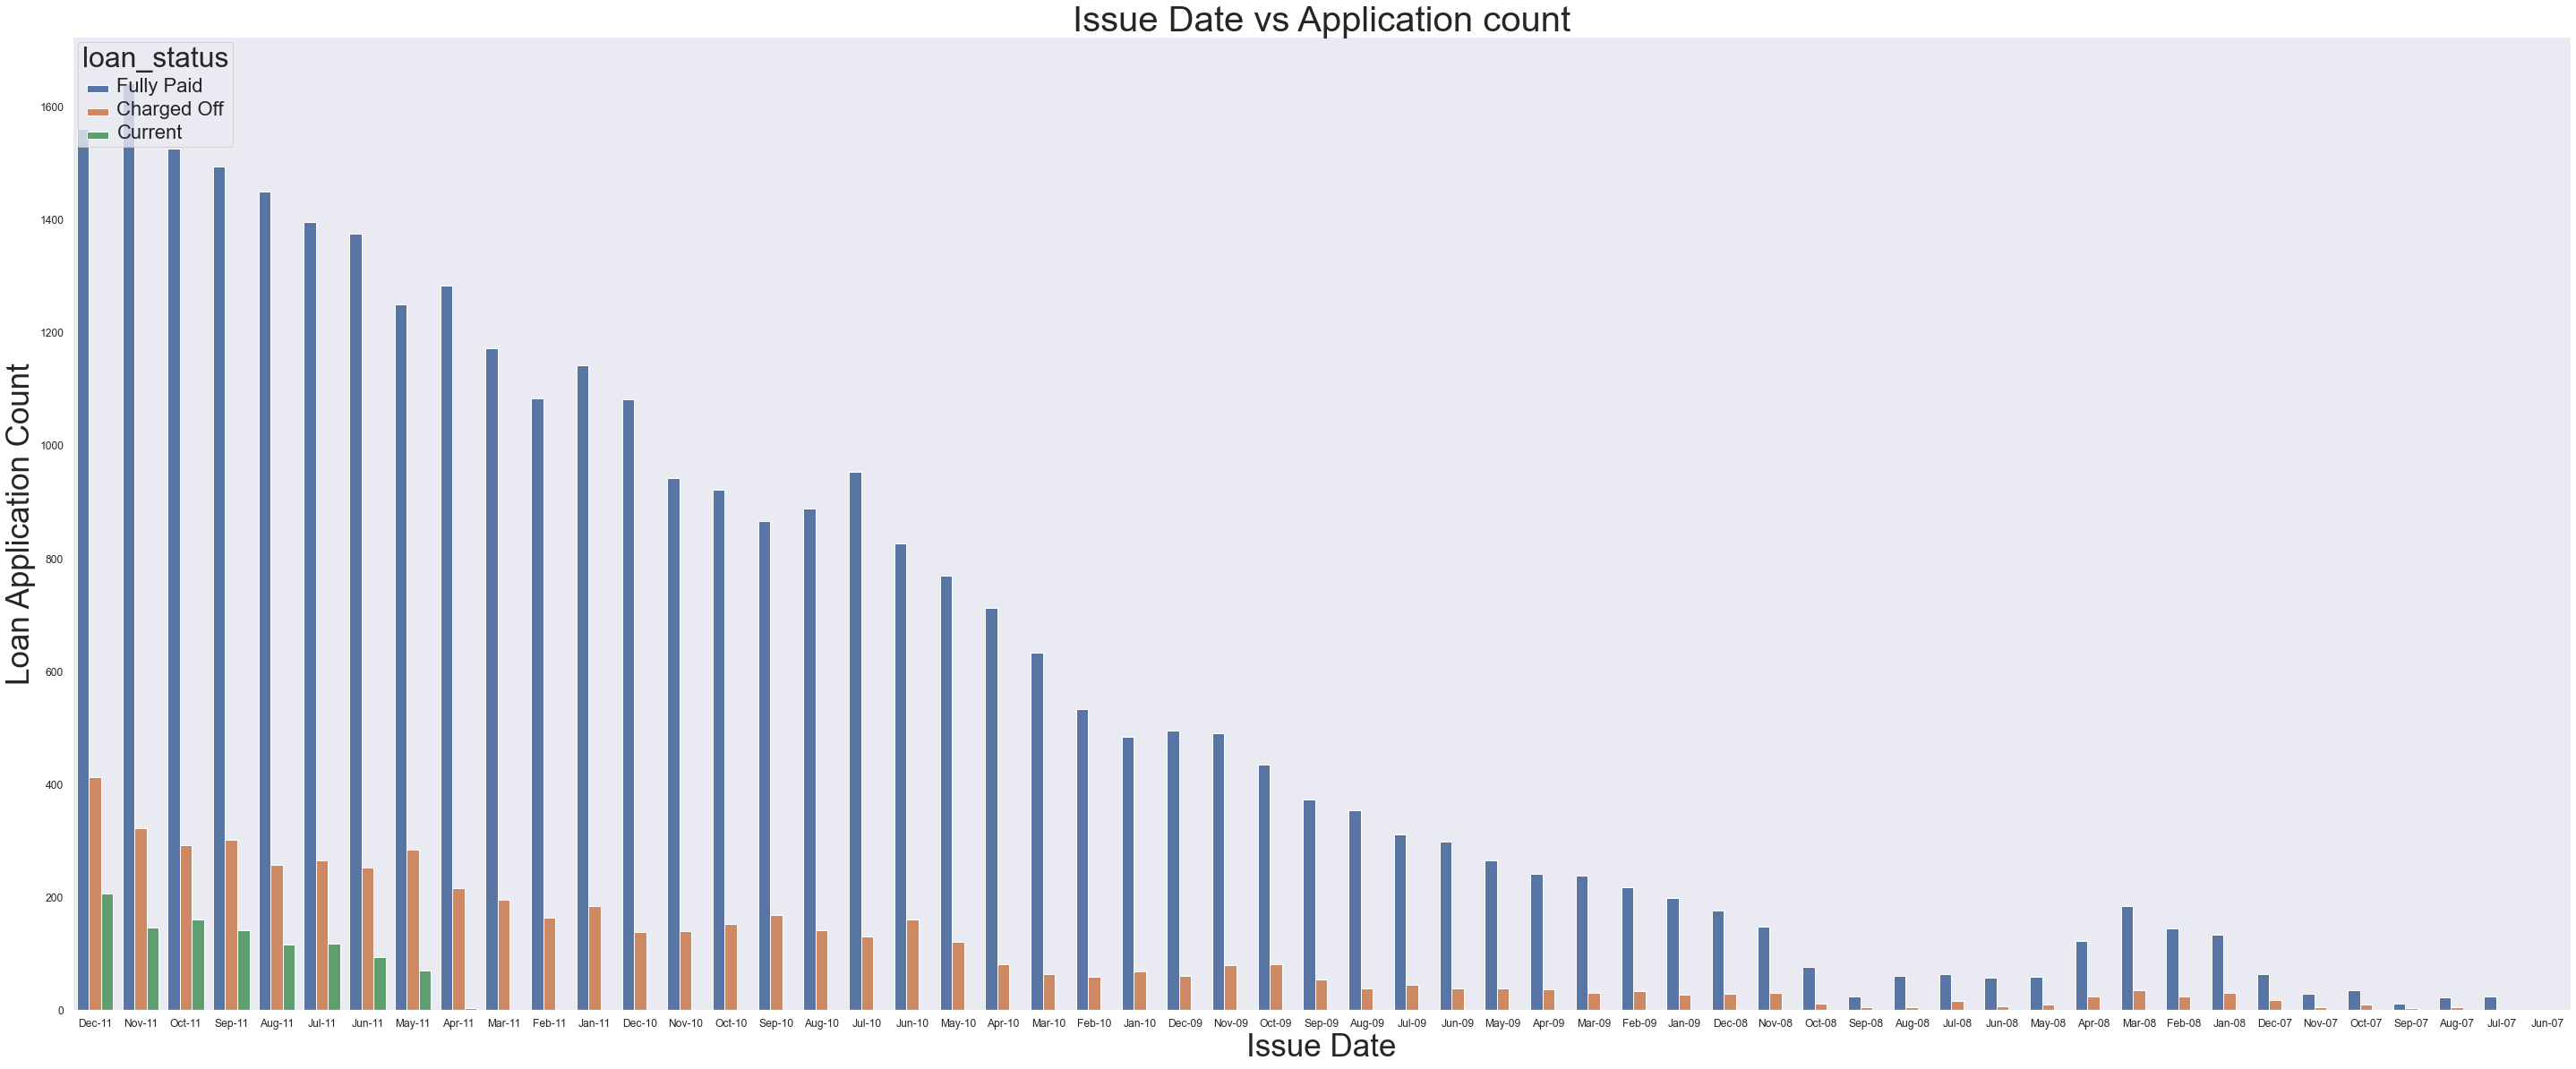

In [183]:
plt.figure(figsize=(50,20),facecolor='w')
ax =sns.countplot(x="issue_d",data=loan_df,hue='loan_status')
ax.set_title('Issue Date vs Application count',fontsize=40)
ax.set_xlabel('Issue Date',fontsize=35)
ax.set_ylabel('Loan Application Count',fontsize=35)      

plt.setp(ax.get_legend().get_texts(), fontsize='22')
plt.setp(ax.get_legend().get_title(), fontsize='32') 
plt.show()

# Charge off grows as number of total loans grow as with time, not representing any cycle or pattern month wise
# There is significant decline in business from March 2008 till Nov 2008

### issue_y

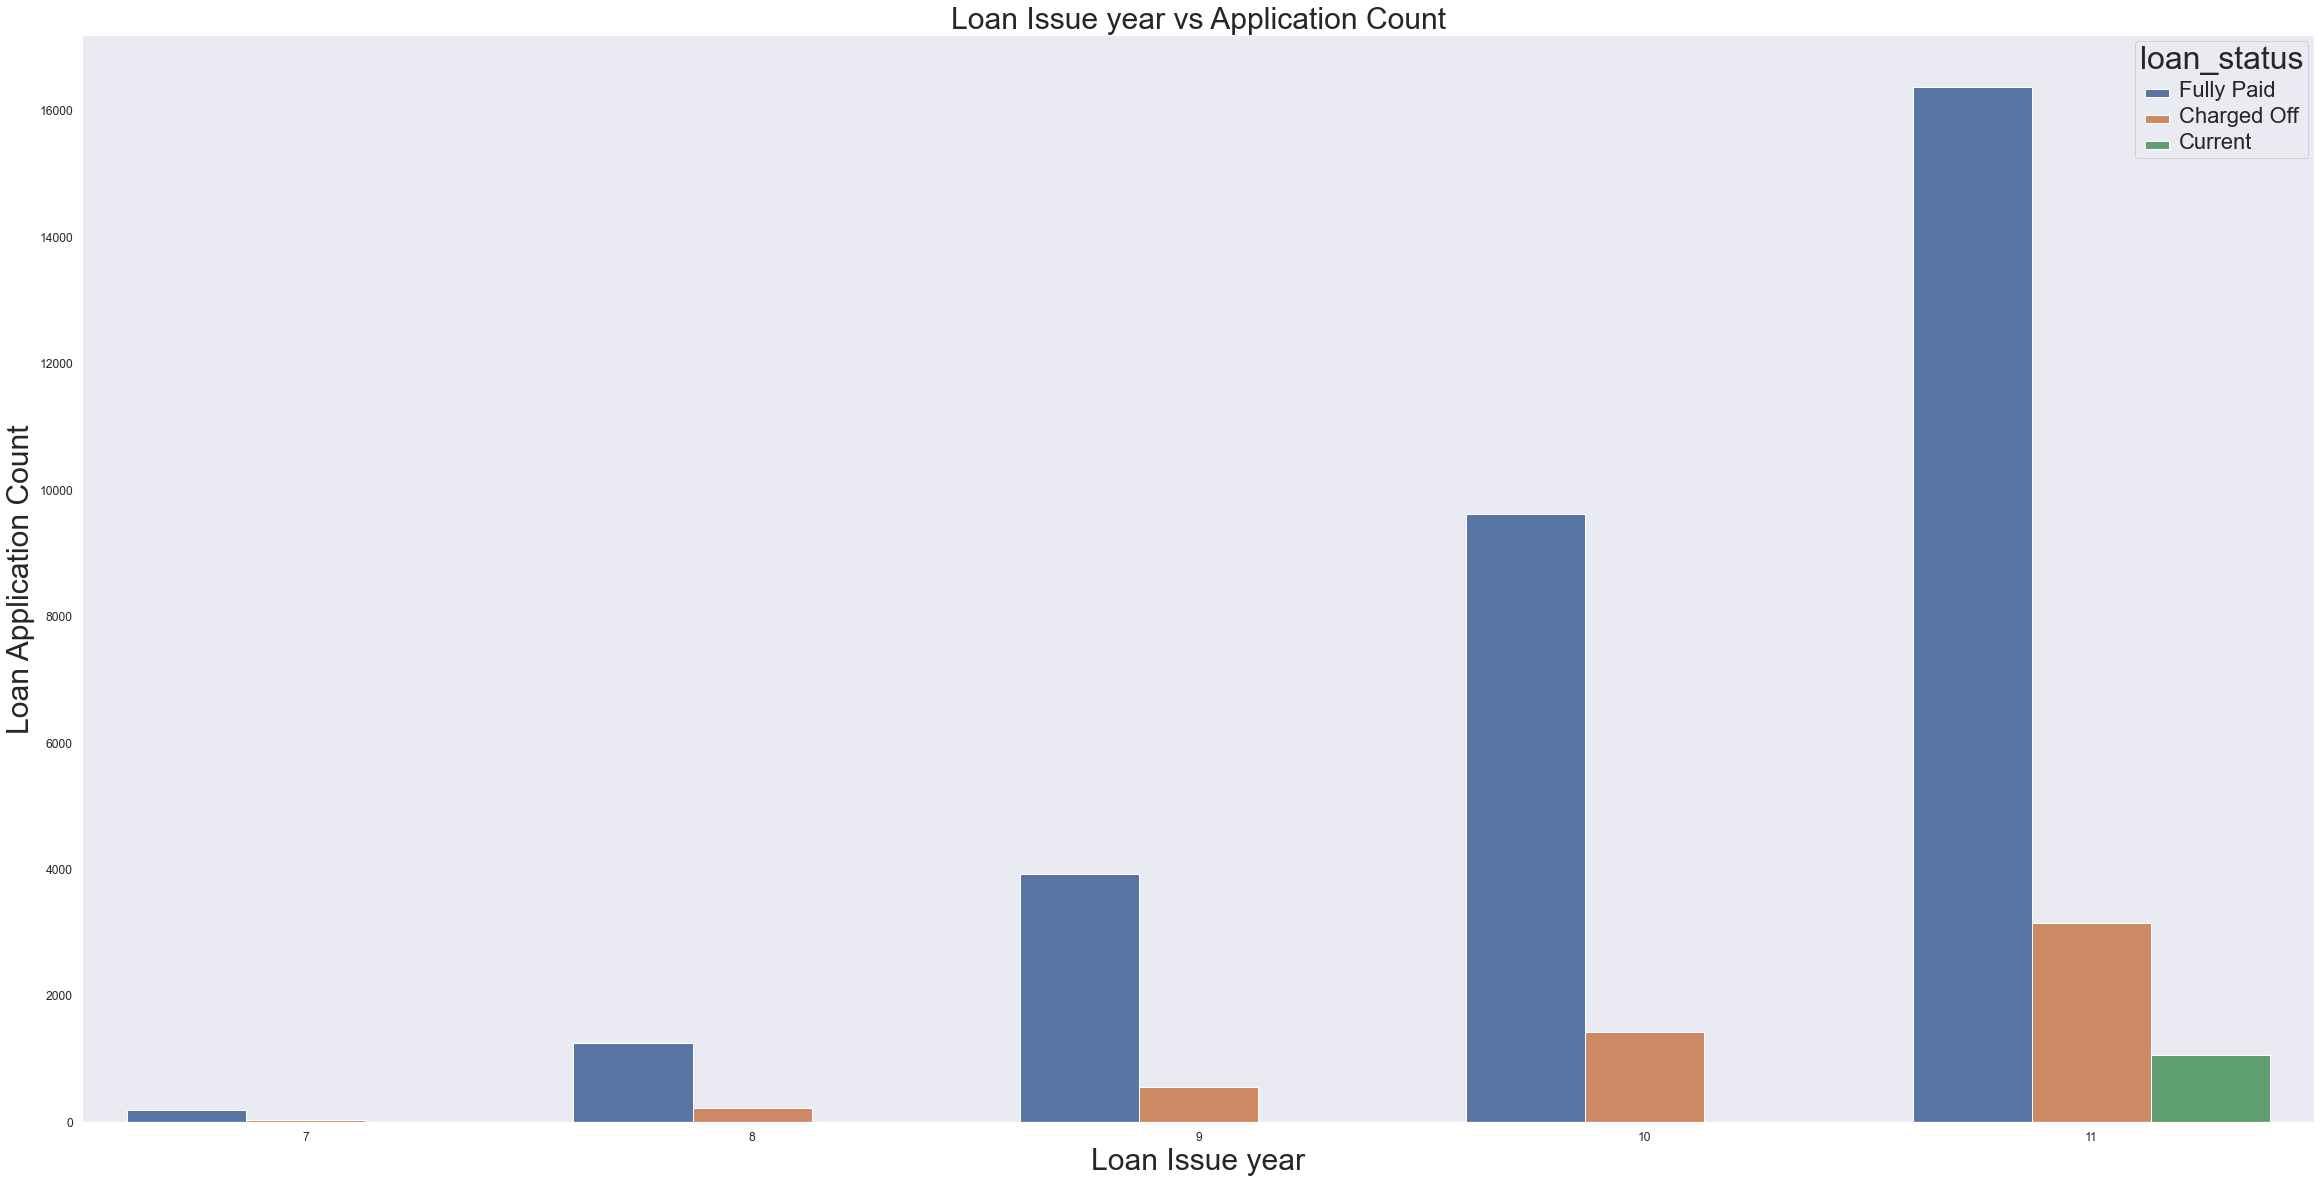

In [184]:
plt.figure(figsize=(40,20),facecolor='w')
ax =sns.countplot(x="issue_y",data=loan_df,hue='loan_status')
ax.set_title('Loan Issue year vs Application Count',fontsize=30)
ax.set_xlabel('Loan Issue year',fontsize=30)
ax.set_ylabel('Loan Application Count',fontsize=30)  
plt.setp(ax.get_legend().get_texts(), fontsize='22') 
plt.setp(ax.get_legend().get_title(), fontsize='32') 
plt.show()

### issue_month

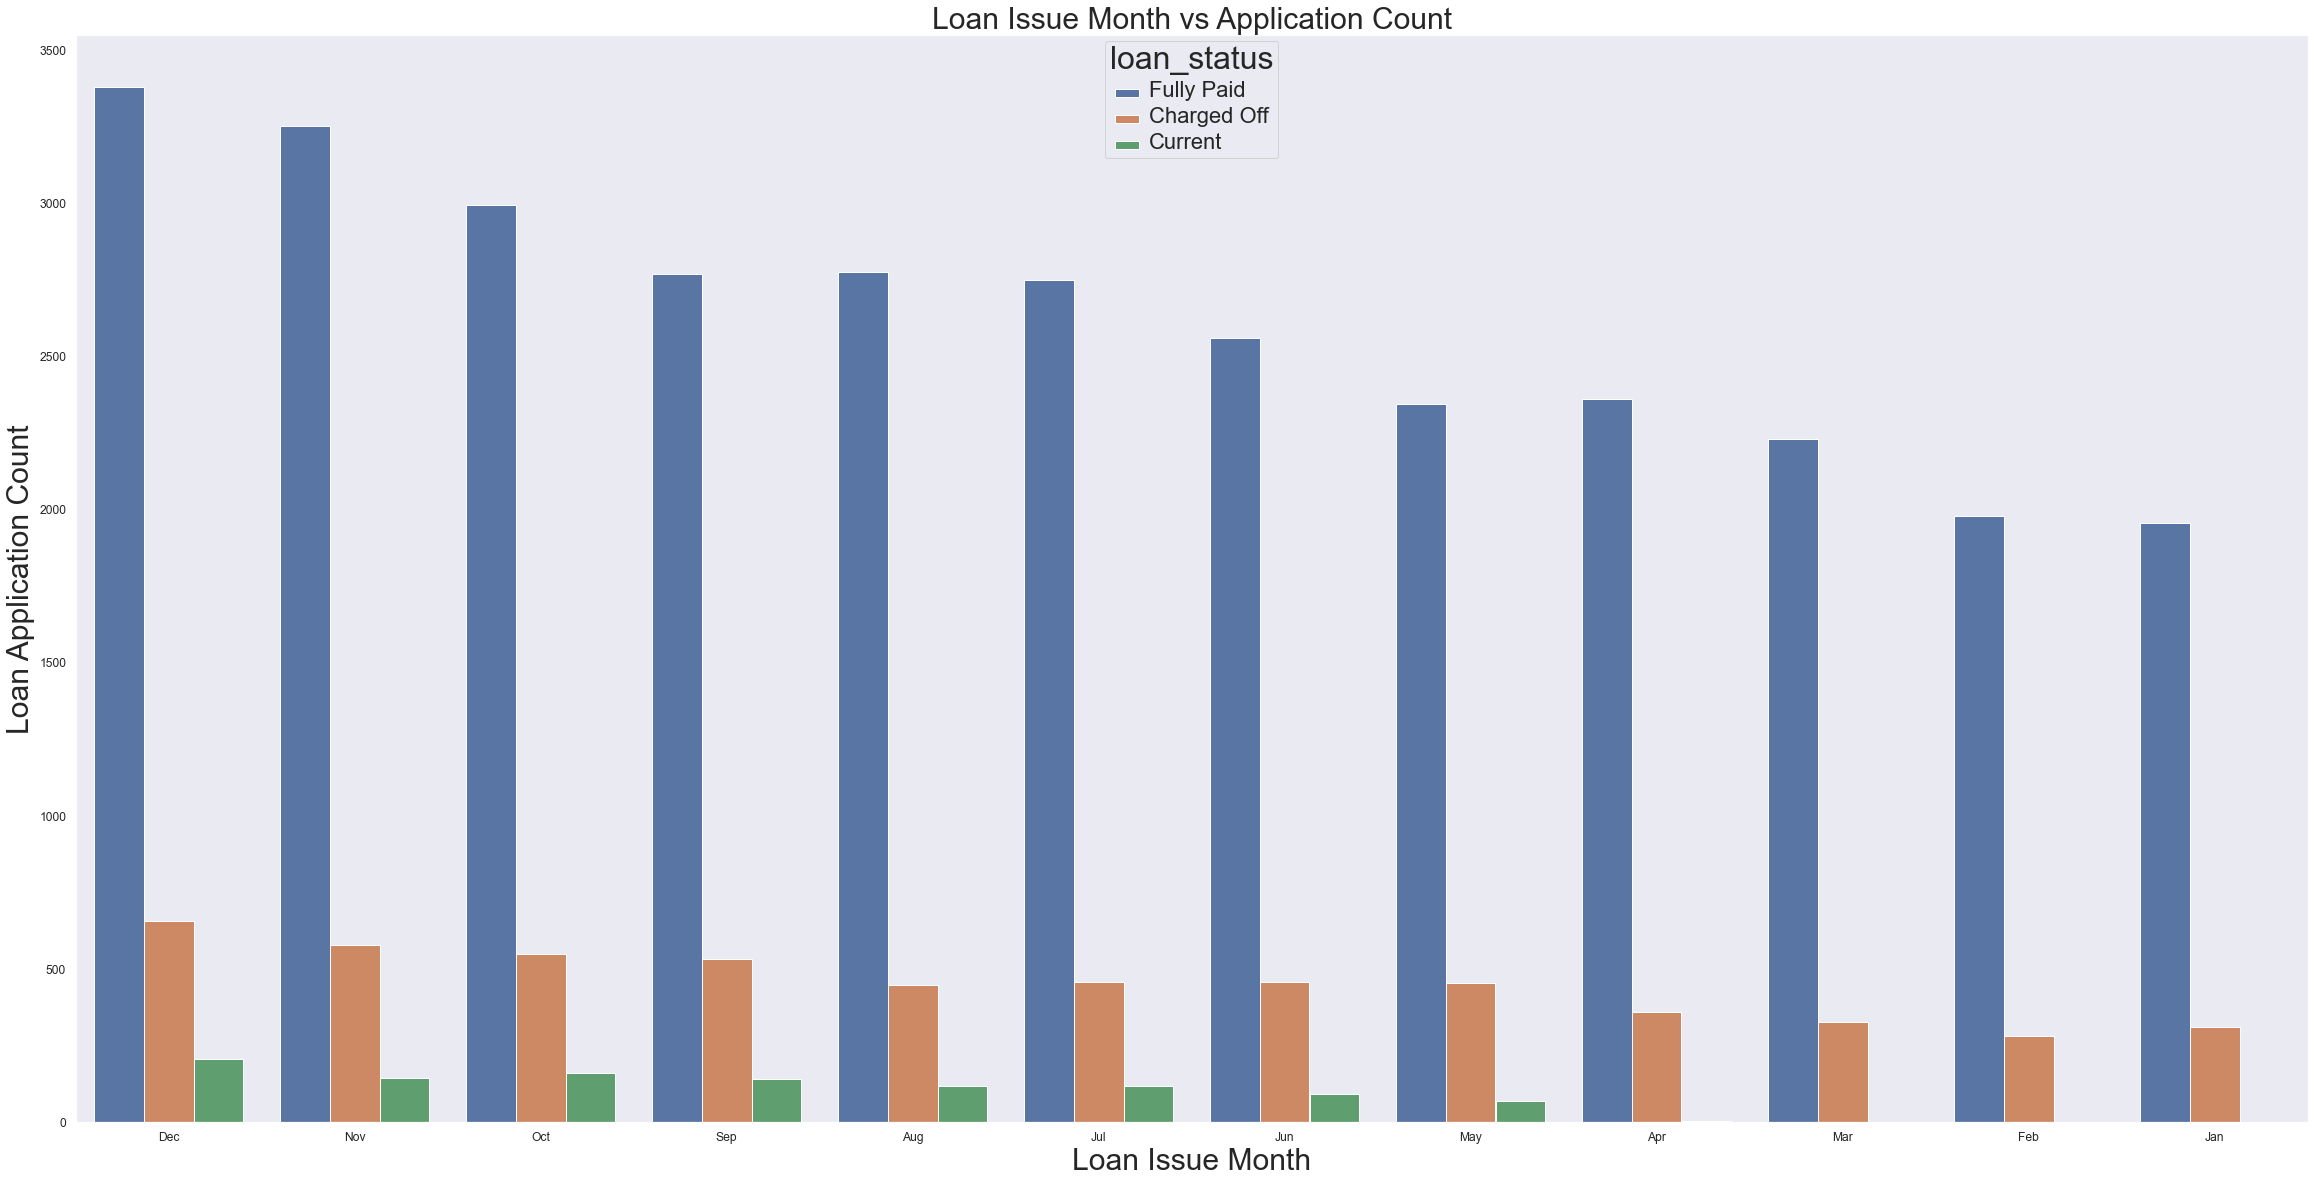

In [185]:
plt.figure(figsize=(40,20),facecolor='w')
ax =sns.countplot(x="issue_m",data=loan_df,hue='loan_status')
ax.set_title('Loan Issue Month vs Application Count',fontsize=30)
ax.set_xlabel('Loan Issue Month',fontsize=30)
ax.set_ylabel('Loan Application Count',fontsize=30)  
plt.setp(ax.get_legend().get_texts(), fontsize='22') 
plt.setp(ax.get_legend().get_title(), fontsize='32')
plt.show()


### Correlation Heatmap for Finding relations

<Figure size 4320x2160 with 0 Axes>

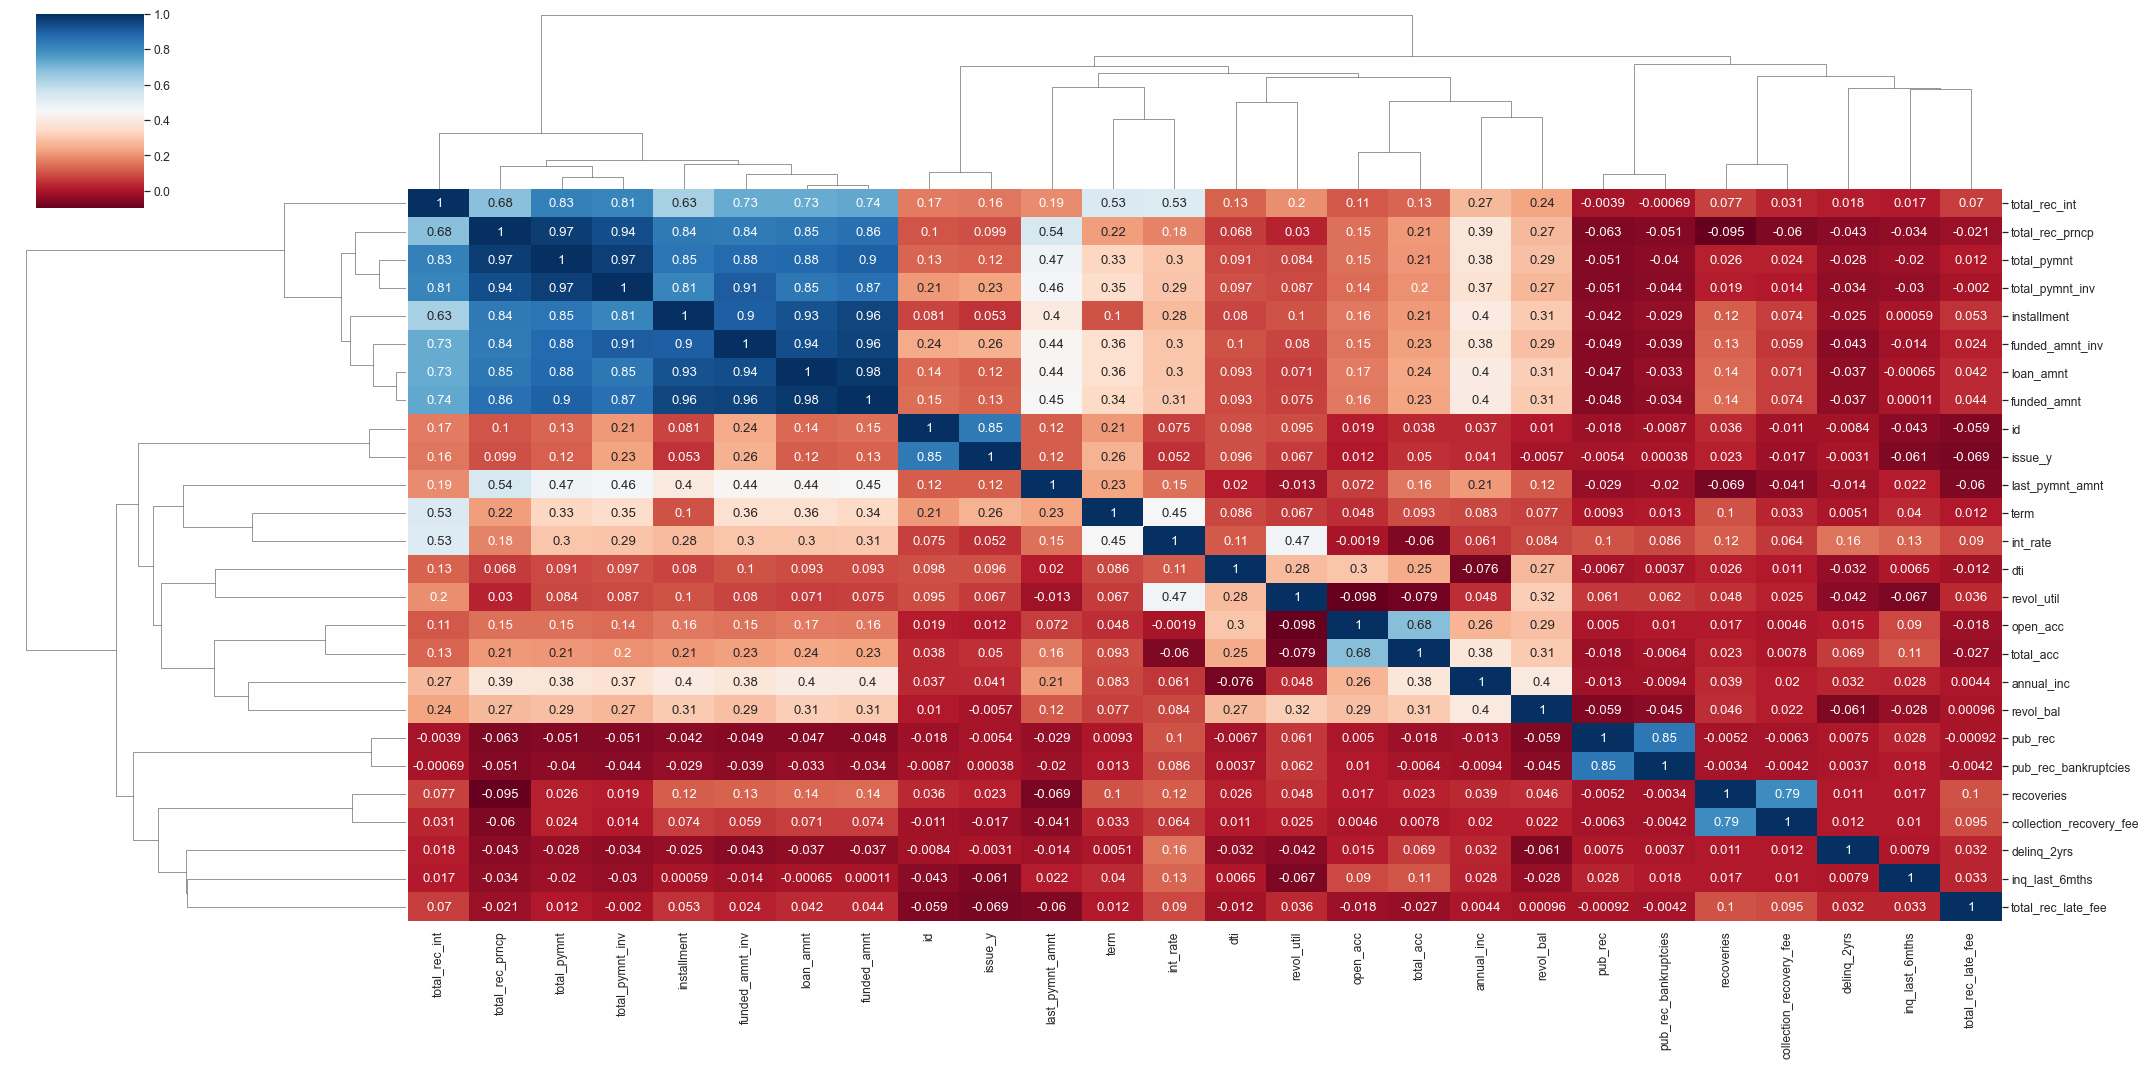

In [186]:
ln=loan_df.drop(["out_prncp","out_prncp_inv",'grade','sub_grade','emp_length','home_ownership','verification_status','issue_d','loan_status','pymnt_plan','purpose','title','zip_code','addr_state','earliest_cr_line','initial_list_status','application_type','issue_m','funded_amnt_bins','int_rate_bins','annual_inc_bins','dti_bins','revol_util_bins','count'], axis=1)
corr_df=ln.corr()
sns.set(font_scale=1.1)
plt.figure(figsize=[60,30])
sns.clustermap(corr_df,annot=True,figsize=[30,15],cmap="RdBu")
plt.show()

# High Correlation

# (Loan_amnt, funded_amt,funded_amnt_inv,installment,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int)

# (recovery,recovery_fee)


### annual_inc_bins vs loan_status

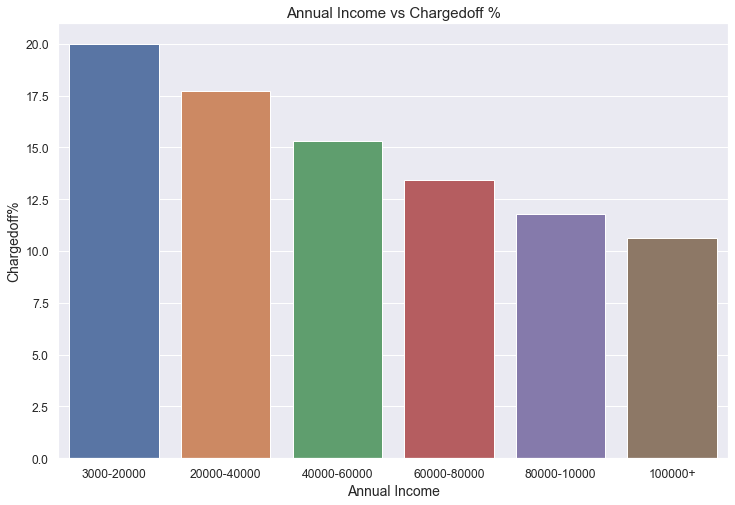

loan_status,annual_inc_bins,Charged Off,Current,Fully Paid,Charged_off%
0,3000-20000,233,9,933,19.982847
1,20000-40000,1507,170,6991,17.733584
2,40000-60000,1725,345,9528,15.329246
3,60000-80000,1023,240,6596,13.426959
4,80000-10000,531,170,3982,11.766009
5,100000+,396,123,3323,10.648024


In [187]:
inc_category_pivot=pd.pivot_table(data=loan_df,index="annual_inc_bins",columns="loan_status", values="count", aggfunc=sum)
inc_category_pivot.reset_index(inplace=True)
inc_category_pivot["Charged_off%"]=inc_category_pivot["Charged Off"]*100/(inc_category_pivot['Charged Off']+ inc_category_pivot['Fully Paid']) 

fig, ax1 = plt.subplots(figsize=(12, 8))
ax1.set_title('Annual Income vs Chargedoff %',fontsize=15)
ax1=sns.barplot(x='annual_inc_bins', y='Charged_off%', data=inc_category_pivot)
ax1.set_ylabel('Chargedoff%',fontsize=14)
ax1.set_xlabel('Annual Income',fontsize=14)
plt.show()
inc_category_pivot

# Most charged offs nearly 20% belong to low income category

### DTI vs Charged Off

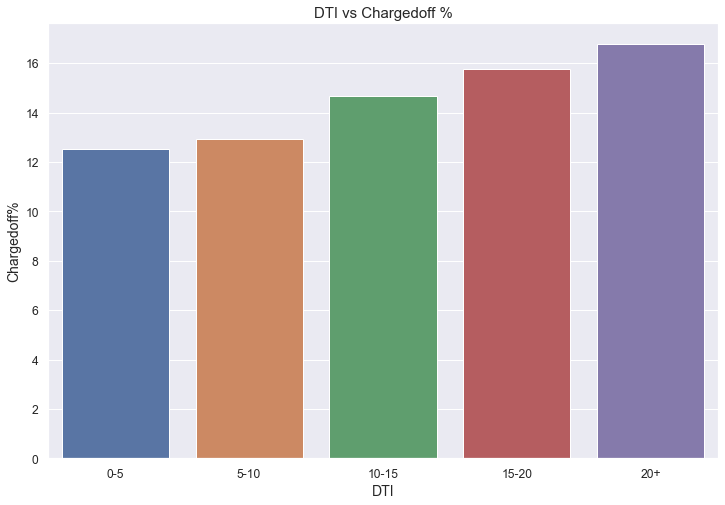

loan_status,annual_inc_bins,Charged Off,Current,Fully Paid,Charged_off%
0,3000-20000,233,9,933,19.982847
1,20000-40000,1507,170,6991,17.733584
2,40000-60000,1725,345,9528,15.329246
3,60000-80000,1023,240,6596,13.426959
4,80000-10000,531,170,3982,11.766009
5,100000+,396,123,3323,10.648024


In [188]:
dti_category_pivot=pd.pivot_table(data=loan_df,index="dti_bins",columns="loan_status", values="count", aggfunc=sum)
dti_category_pivot.reset_index(inplace=True)
dti_category_pivot["Charged_off%"]=dti_category_pivot["Charged Off"]*100/(dti_category_pivot['Charged Off']+ dti_category_pivot['Fully Paid']) 

fig, ax1 = plt.subplots(figsize=(12, 8))
ax1.set_title('DTI vs Chargedoff %',fontsize=15)
ax1=sns.barplot(x='dti_bins', y='Charged_off%', data=dti_category_pivot)
ax1.set_ylabel('Chargedoff%',fontsize=14)
ax1.set_xlabel('DTI',fontsize=14)
plt.show()
inc_category_pivot
# Higher the DTI higher the charged off

### Empl_length vc Charged Off

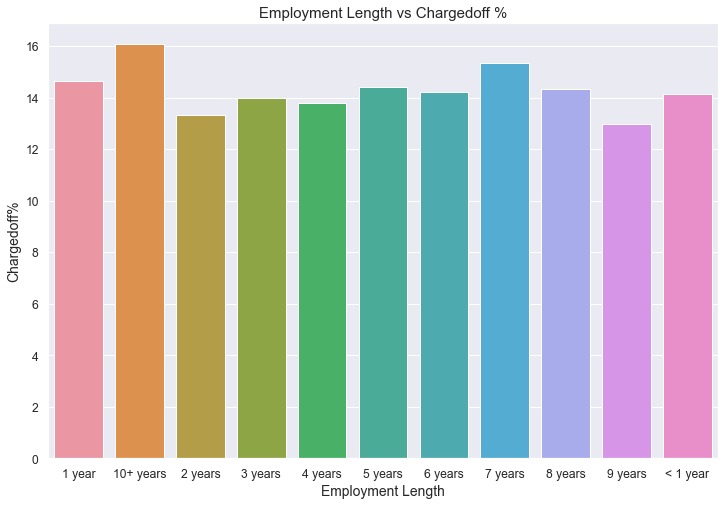

loan_status,emp_length,Charged Off,Current,Fully Paid,Charged_off%
0,1 year,447,67,2603,14.655738
1,10+ years,1275,355,6658,16.072104
2,2 years,547,92,3565,13.302529
3,3 years,537,76,3301,13.991662
4,4 years,442,90,2765,13.782351
5,5 years,440,81,2612,14.416776
6,6 years,295,57,1783,14.196343
7,7 years,252,58,1392,15.328467
8,8 years,193,40,1153,14.338782
9,9 years,150,31,1007,12.964564


In [189]:
emp_category_pivot=pd.pivot_table(data=loan_df,index="emp_length",columns="loan_status", values="count", aggfunc=sum)
emp_category_pivot.reset_index(inplace=True)
emp_category_pivot["Charged_off%"]=emp_category_pivot["Charged Off"]*100/(emp_category_pivot['Charged Off']+ emp_category_pivot['Fully Paid']) 


fig, ax1 = plt.subplots(figsize=(12, 8))
ax1.set_title('Employment Length vs Chargedoff %',fontsize=15)
ax1=sns.barplot(x='emp_length', y='Charged_off%', data=emp_category_pivot)
ax1.set_ylabel('Chargedoff%',fontsize=14)
ax1.set_xlabel('Employment Length',fontsize=14)
plt.show()
emp_category_pivot
# % Charged Off is higher for 10 year + 

### home_ownership vs Charged Off

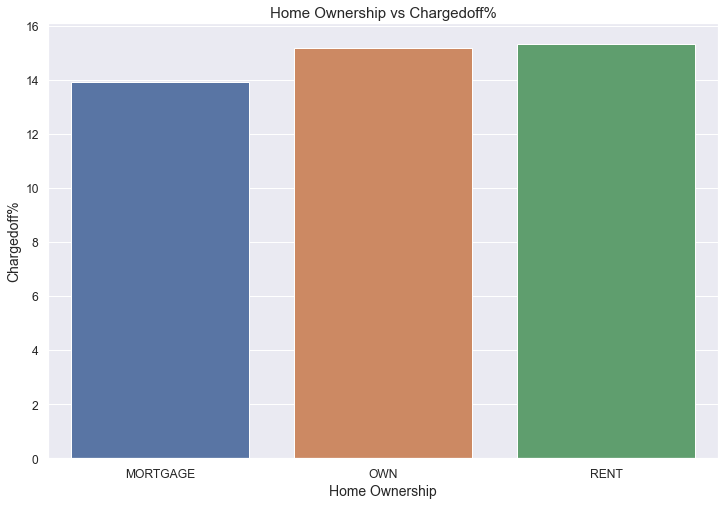

loan_status,home_ownership,Charged Off,Current,Fully Paid,Charged_off%
0,MORTGAGE,2200,572,13585,13.937282
1,OWN,434,80,2423,15.190760
2,RENT,2764,405,15268,15.328305


In [190]:

loan_df_x = loan_df[(loan_df["home_ownership"]=="MORTGAGE") | (loan_df["home_ownership"]=="RENT") | (loan_df["home_ownership"]=="OWN")]
home_category_pivot=pd.pivot_table(data=loan_df_x,index="home_ownership",columns="loan_status", values="count", aggfunc=sum)
home_category_pivot.reset_index(inplace=True)
home_category_pivot["Charged_off%"]=home_category_pivot["Charged Off"]*100/(home_category_pivot['Charged Off']+ home_category_pivot['Fully Paid']) 

fig, ax1 = plt.subplots(figsize=(12, 8))
ax1.set_title('Home Ownership vs Chargedoff%',fontsize=15)
ax1=sns.barplot(x='home_ownership', y='Charged_off%', data=home_category_pivot)
ax1.set_ylabel('Chargedoff%',fontsize=14)
ax1.set_xlabel('Home Ownership',fontsize=14)
plt.show()
home_category_pivot

# People on Rent and own have higher chances of charged Off 

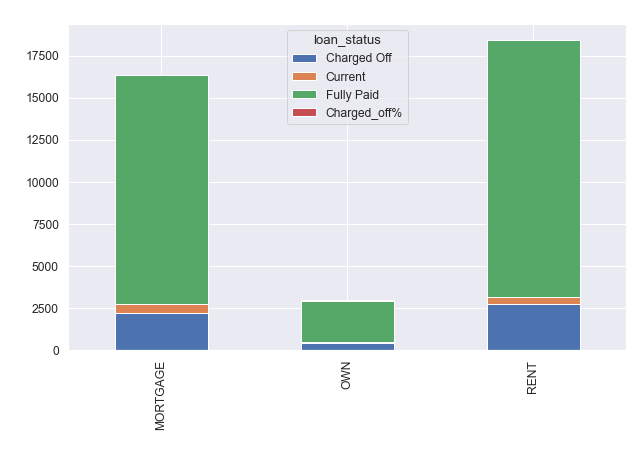

loan_status,Charged Off,Current,Fully Paid,Charged_off%
home_ownership,,,,
MORTGAGE,2200,572,13585,13.937282
OWN,434,80,2423,15.190760
RENT,2764,405,15268,15.328305


In [191]:
home_category_pivot = home_category_pivot.set_index("home_ownership")
home_category_pivot.plot(kind="bar", stacked="True", figsize=[10,6])
plt.title('Home Ownership vs Number of loans',fontsize=15,color = 'w')
plt.ylabel('Number of Loans',fontsize=14,color = 'w')
plt.xlabel('Home Ownership',fontsize=14,color='w')
plt.show()
home_category_pivot
## Rent and own have higher charged with some marginal difference.

### verification_status vs Charged Off

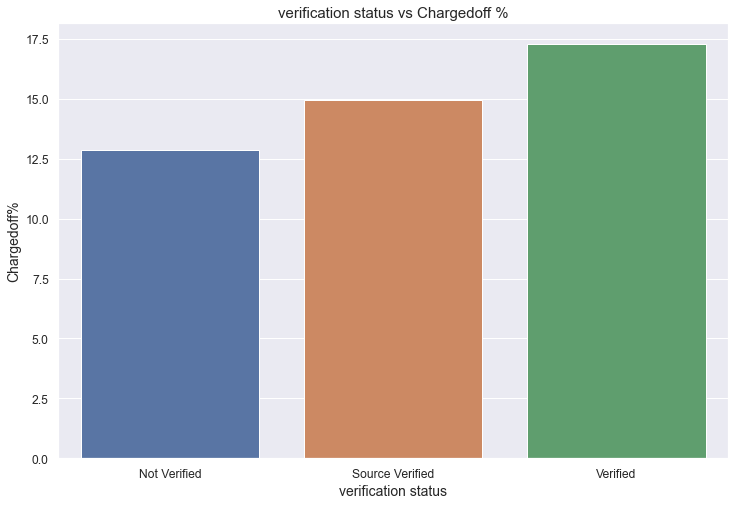

loan_status,verification_status,Charged Off,Current,Fully Paid,Charged_off%
0,Not Verified,2092,225,14200,12.840658
1,Source Verified,1372,282,7812,14.939024
2,Verified,1951,550,9341,17.277719


In [192]:
ver_category_pivot=pd.pivot_table(data=loan_df,index="verification_status",columns="loan_status", values="count", aggfunc=sum)
ver_category_pivot.reset_index(inplace=True)
ver_category_pivot["Charged_off%"]=ver_category_pivot["Charged Off"]*100/(ver_category_pivot['Charged Off']+ ver_category_pivot['Fully Paid']) 

fig, ax1 = plt.subplots(figsize=(12, 8))
ax1.set_title('verification status vs Chargedoff %',fontsize=15)
ax1=sns.barplot(x='verification_status', y='Charged_off%', data=ver_category_pivot)
ax1.set_ylabel('Chargedoff%',fontsize=14)
ax1.set_xlabel('verification status',fontsize=14)
plt.show()
ver_category_pivot

#verfied sources have higher charged off


 ### Purpose vs Charged Off

<Figure size 864x576 with 0 Axes>

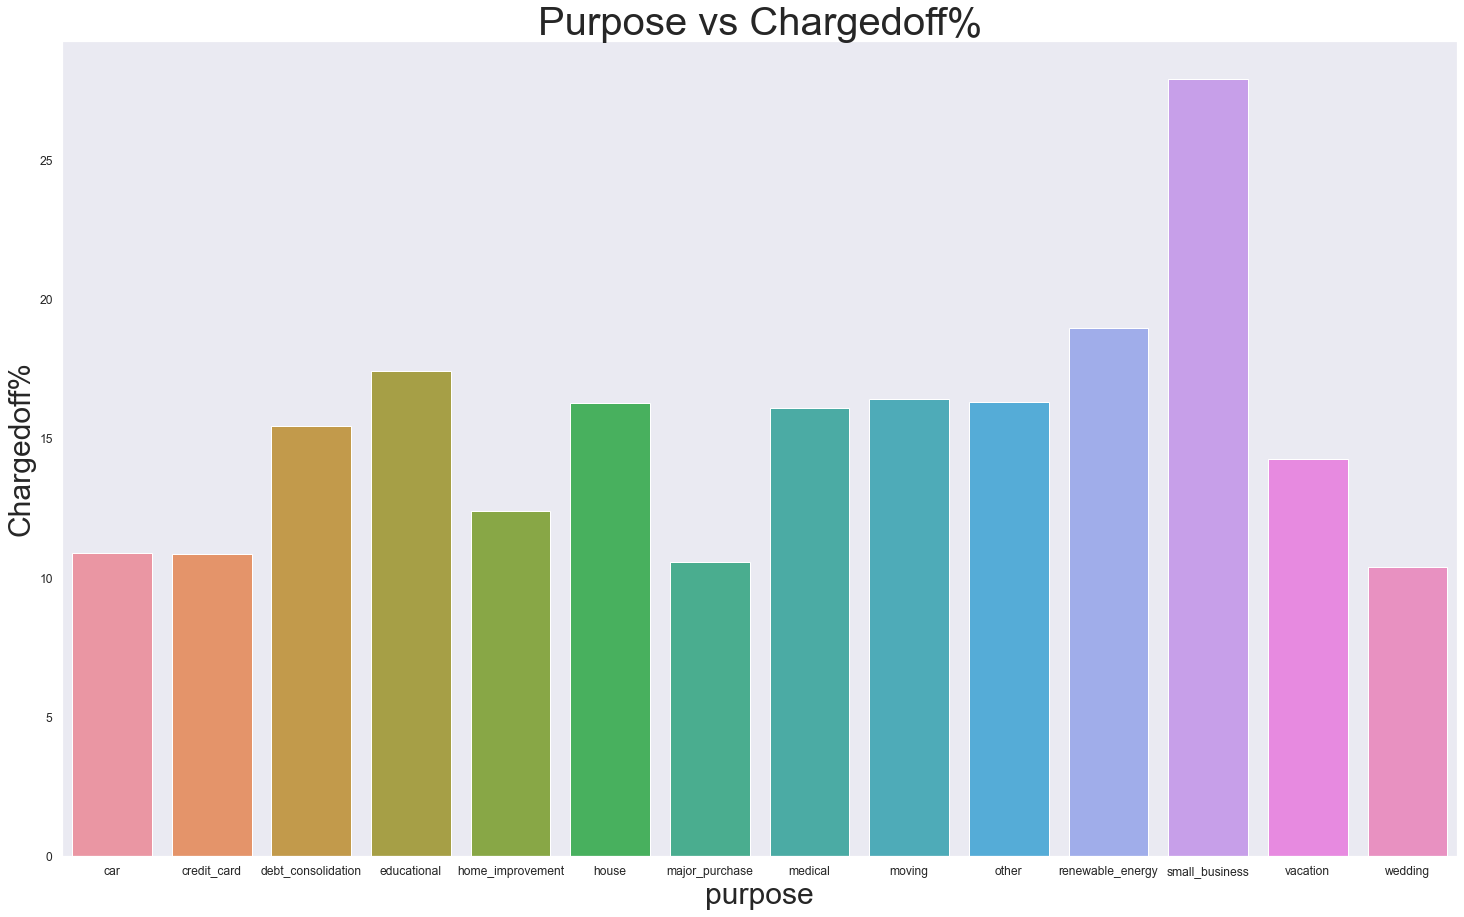

loan_status,purpose,Charged Off,Current,Fully Paid,Charged_off%
0,car,158.0,50.0,1296.0,10.866575
1,credit_card,521.0,97.0,4280.0,10.851906
2,debt_consolidation,2679.0,550.0,14688.0,15.425808
3,educational,54.0,NaN,256.0,17.419355
4,home_improvement,319.0,82.0,2260.0,12.369135
5,house,55.0,12.0,283.0,16.272189
6,major_purchase,216.0,36.0,1833.0,10.541728
7,medical,103.0,9.0,537.0,16.093750
8,moving,90.0,7.0,458.0,16.423358
9,other,603.0,116.0,3096.0,16.301703


In [193]:
pur_category_pivot=pd.pivot_table(data=loan_df,index="purpose",columns="loan_status", values="count", aggfunc=sum)
pur_category_pivot.reset_index(inplace=True)
pur_category_pivot["Charged_off%"]=pur_category_pivot["Charged Off"]*100/(pur_category_pivot['Charged Off']+ pur_category_pivot['Fully Paid']) 

plt.figure(figsize=(12,8),facecolor='b')
sns.set_style("dark")


fig, ax1 = plt.subplots(figsize=(25, 15))
ax1.set_title('Purpose vs Chargedoff%',fontsize=40)
ax1=sns.barplot(x='purpose', y='Charged_off%', data=pur_category_pivot)
ax1.set_ylabel('Chargedoff%',fontsize=30)
ax1.set_xlabel('purpose',fontsize=30)
plt.show()
pur_category_pivot

# Small businesses account for highest charged Off % among all categories

### Address State vs Charged Off

<Figure size 864x576 with 0 Axes>

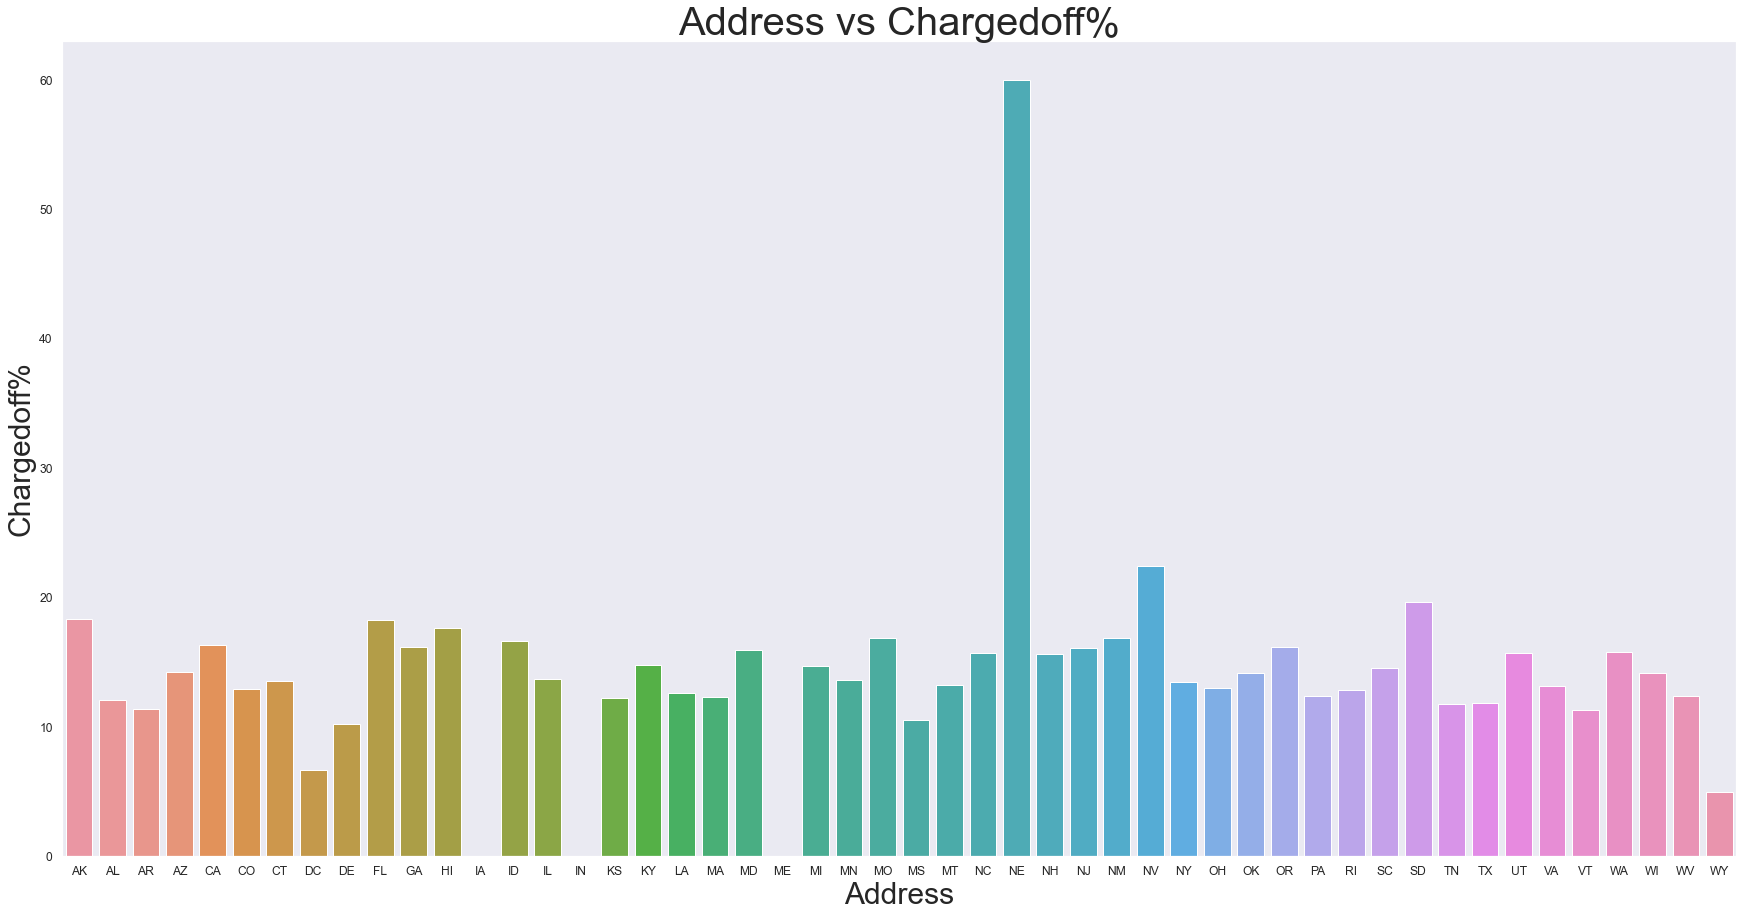

In [194]:
adr_category_pivot=pd.pivot_table(data=loan_df,index="addr_state",columns="loan_status", values="count", aggfunc=sum)
adr_category_pivot.reset_index(inplace=True)
adr_category_pivot["Charged_off%"]=adr_category_pivot["Charged Off"]*100/(adr_category_pivot['Charged Off']+ adr_category_pivot['Fully Paid']) 

plt.figure(figsize=(12,8),facecolor='b')
sns.set_style("dark")


fig, ax1 = plt.subplots(figsize=(30, 15))
ax1.set_title('Address vs Chargedoff%',fontsize=40)
ax1=sns.barplot(x='addr_state', y='Charged_off%', data=adr_category_pivot)
ax1.set_ylabel('Chargedoff%',fontsize=30)
ax1.set_xlabel('Address',fontsize=30)
plt.show()

# NE has highest charged off % of 60%

### ZipCode vs Charged Off

<Figure size 4320x1440 with 0 Axes>

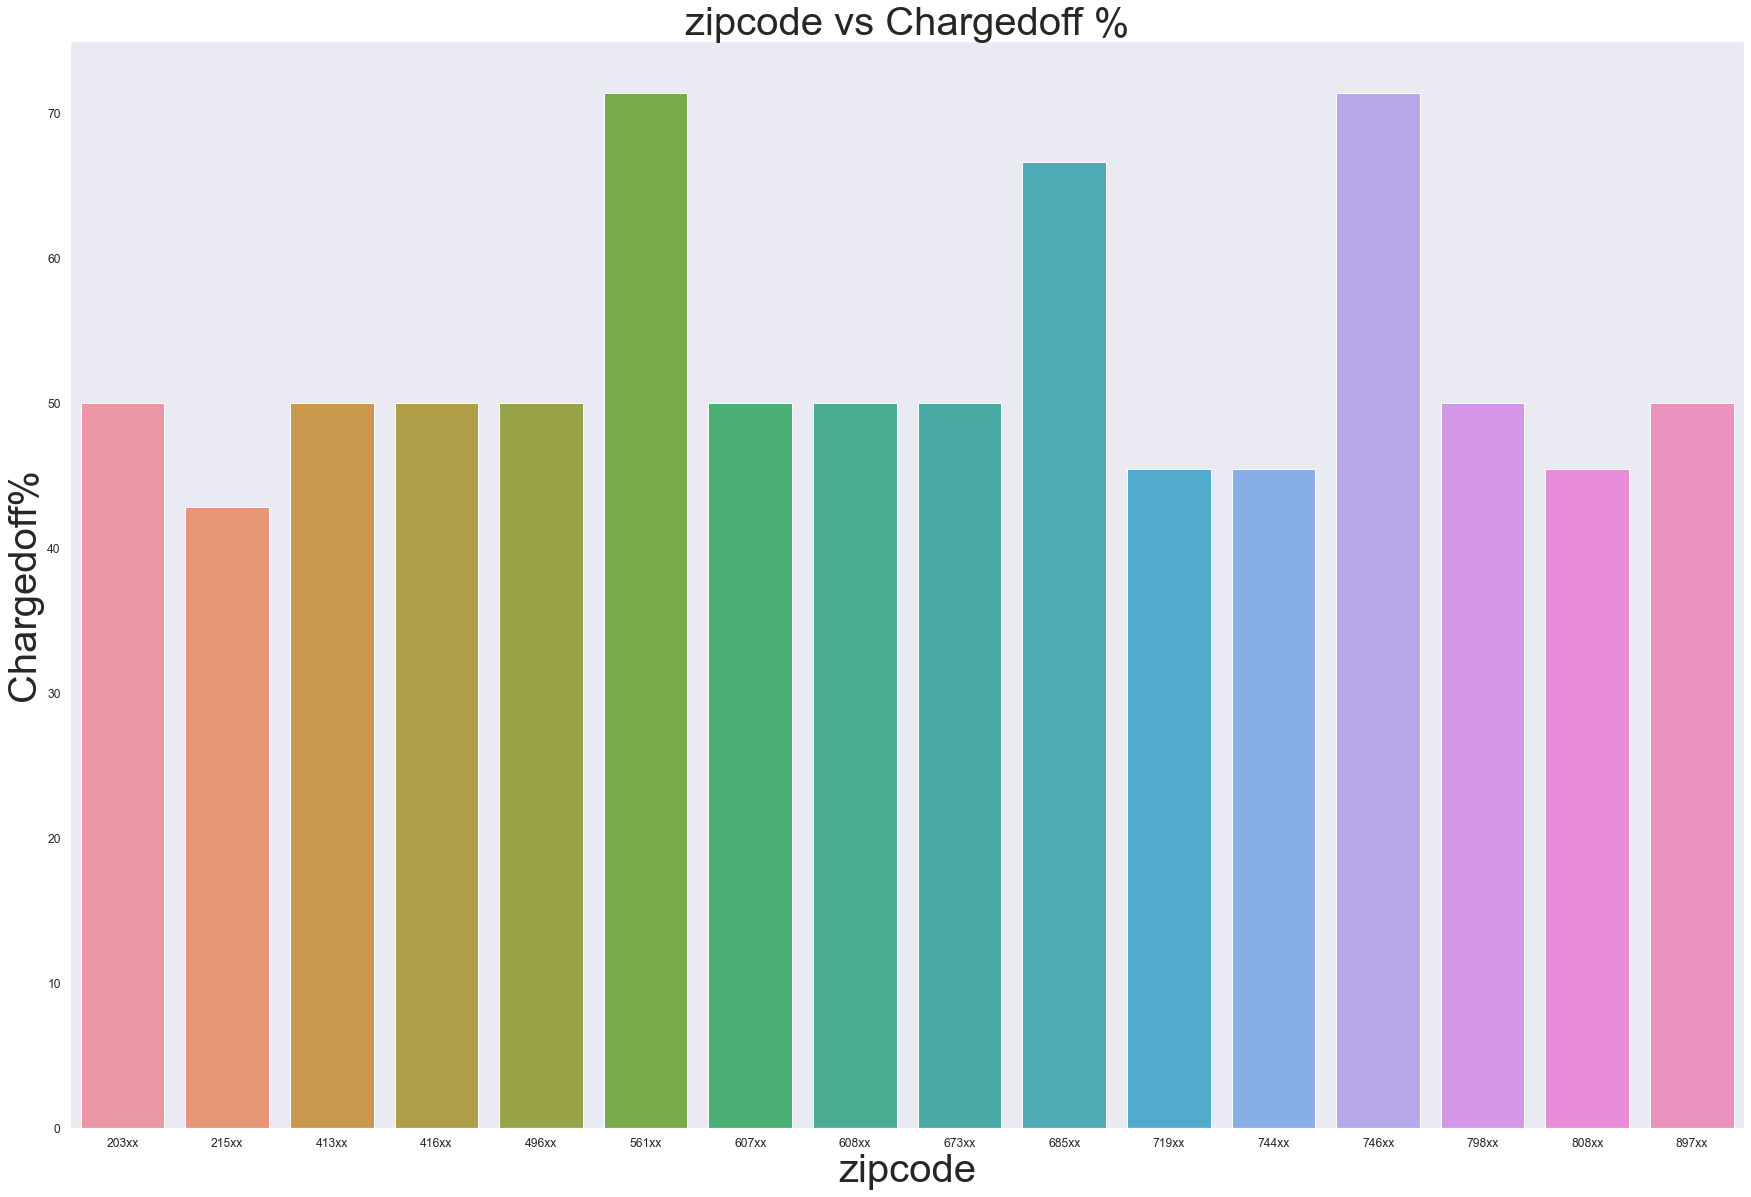

loan_status,zip_code,Charged Off,Current,Fully Paid,Charged_off%
174,203xx,1.0,NaN,1.0,50.000000
183,215xx,3.0,1.0,4.0,42.857143
368,413xx,1.0,NaN,1.0,50.000000
371,416xx,2.0,1.0,2.0,50.000000
434,496xx,3.0,1.0,3.0,50.000000
469,561xx,5.0,NaN,2.0,71.428571
501,607xx,7.0,NaN,7.0,50.000000
502,608xx,4.0,NaN,4.0,50.000000
561,673xx,1.0,NaN,1.0,50.000000
569,685xx,2.0,NaN,1.0,66.666667


In [195]:
zip_category_pivot=pd.pivot_table(data=loan_df,index="zip_code",columns="loan_status", values="count", aggfunc=sum)
zip_category_pivot.reset_index(inplace=True)
zip_category_pivot["Charged_off%"]=zip_category_pivot["Charged Off"]*100/(zip_category_pivot['Charged Off']+ zip_category_pivot['Fully Paid']) 

plt.figure(figsize=(60,20),facecolor='b')
sns.set_style("dark")

zip_category_pivot=zip_category_pivot[zip_category_pivot["Charged_off%"]>40]
fig, ax1 = plt.subplots(figsize=(30, 20))
ax1.set_title('zipcode vs Chargedoff %',fontsize=40)
ax1=sns.barplot(x='zip_code', y='Charged_off%', data=zip_category_pivot)
ax1.set_ylabel('Chargedoff%',fontsize=40)
ax1.set_xlabel('zipcode',fontsize=40)
plt.show()
zip_category_pivot


# 561xx, 685xx, 746xx have highest charged off

In [196]:
zip_anly_category=loan_df.groupby(by=["zip_code"])[["annual_inc"]].mean()
zip_anly_category.reset_index(inplace=True)
zip_anly_category[zip_anly_category['zip_code'].isin(["203xx",'215xx','413xx','416xx','496xx','561xx','607xx','608xx','673xx','685xx','719xx','744xx','746xx','798xx','808xx','897xx'])]
# For zip_code with high charge Off annual income is lower than other; like 561xx

,zip_code,annual_inc
174,203xx,38151.000000
183,215xx,41277.625000
368,413xx,67657.000000
371,416xx,48920.000000
434,496xx,44727.428571
469,561xx,33316.142857
501,607xx,50897.857143
502,608xx,46261.000000
561,673xx,58152.000000
569,685xx,45666.666667


### Grade vs Charged Off

<Figure size 864x576 with 0 Axes>

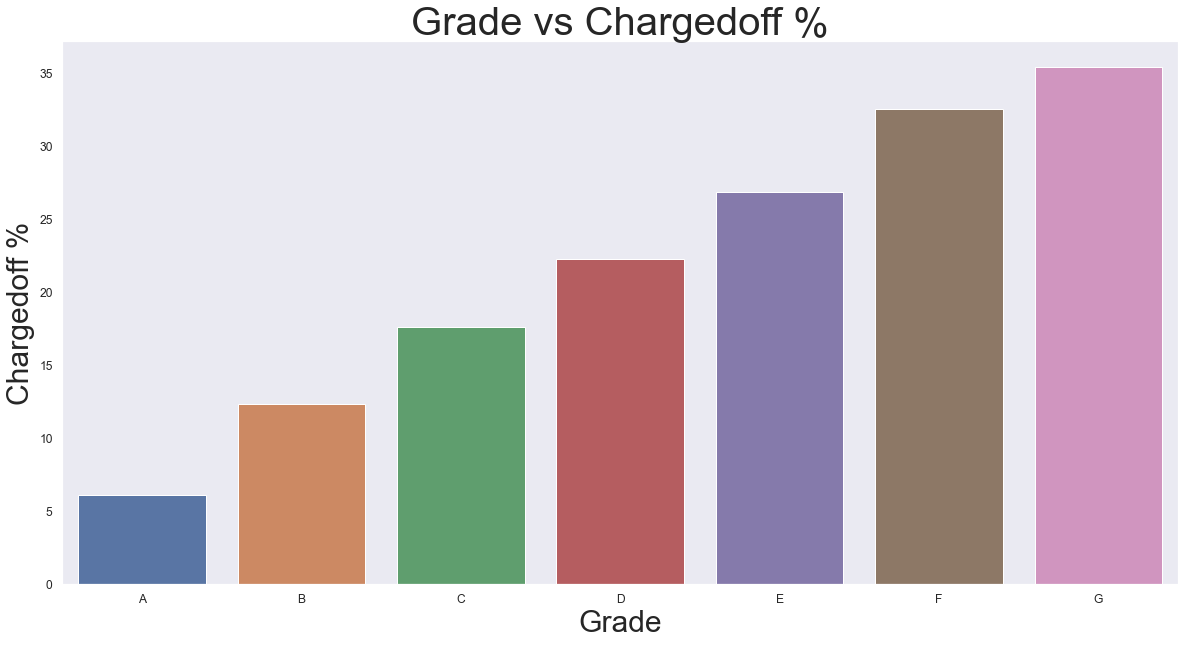

loan_status,grade,Charged Off,Current,Fully Paid,Charged_off%
0,A,593,39,9092,6.122870
1,B,1380,326,9771,12.375572
2,C,1322,249,6170,17.645489
3,D,1080,208,3761,22.309440
4,E,658,163,1792,26.857143
5,F,288,58,596,32.579186
6,G,94,14,171,35.471698


In [197]:
grd_category_pivot=pd.pivot_table(data=loan_df,index="grade",columns="loan_status", values="count", aggfunc=sum)
grd_category_pivot.reset_index(inplace=True)
grd_category_pivot["Charged_off%"]=grd_category_pivot["Charged Off"]*100/(grd_category_pivot['Charged Off']+ grd_category_pivot['Fully Paid']) 

plt.figure(figsize=(12,8),facecolor='b')
sns.set_style("dark")

pur_category_pivot
fig, ax1 = plt.subplots(figsize=(20, 10))
ax1.set_title('Grade vs Chargedoff %',fontsize=40)
ax1=sns.barplot(x='grade', y='Charged_off%', data=grd_category_pivot)
ax1.set_ylabel('Chargedoff %',fontsize=30)
ax1.set_xlabel('Grade',fontsize=30)
plt.show()
grd_category_pivot

# Charged Off % follows the grades, G being highest and A lowest

### Sub Grade vs Charged Off

<Figure size 864x576 with 0 Axes>

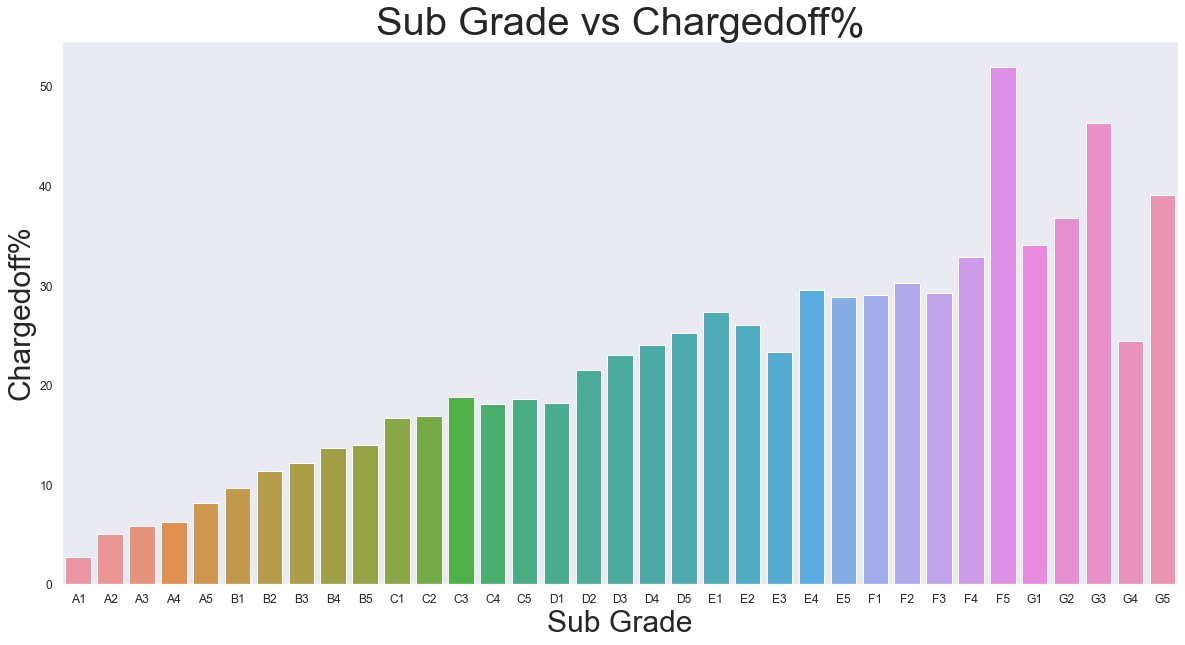

loan_status,sub_grade,Charged Off,Current,Fully Paid,Charged_off%
0,A1,30.0,NaN,1069.0,2.729754
1,A2,74.0,NaN,1383.0,5.078929
2,A3,103.0,NaN,1651.0,5.872292
3,A4,173.0,13.0,2586.0,6.270388
4,A5,213.0,26.0,2403.0,8.142202
5,B1,166.0,32.0,1558.0,9.628770
6,B2,217.0,54.0,1689.0,11.385100
7,B3,326.0,89.0,2347.0,12.196034
8,B4,320.0,69.0,2023.0,13.657704
9,B5,351.0,82.0,2154.0,14.011976


In [198]:
sb_grd_category_pivot=pd.pivot_table(data=loan_df,index="sub_grade",columns="loan_status", values="count", aggfunc=sum)
sb_grd_category_pivot.reset_index(inplace=True)
sb_grd_category_pivot["Charged_off%"]=sb_grd_category_pivot["Charged Off"]*100/(sb_grd_category_pivot['Charged Off']+ sb_grd_category_pivot['Fully Paid']) 

plt.figure(figsize=(12,8),facecolor='b')
sns.set_style("dark")

pur_category_pivot
fig, ax1 = plt.subplots(figsize=(20, 10))
ax1.set_title('Sub Grade vs Chargedoff%',fontsize=40)
ax1=sns.barplot(x='sub_grade', y='Charged_off%', data=sb_grd_category_pivot)
ax1.set_ylabel('Chargedoff%',fontsize=30)
ax1.set_xlabel('Sub Grade',fontsize=30)
plt.show()
sb_grd_category_pivot

# F5 and G3 has the highest Chargedoff% although there is somewhat consistent increase in Chargedoff from A1 to G5

### Funded Amount vs Charged Off

<Figure size 864x576 with 0 Axes>

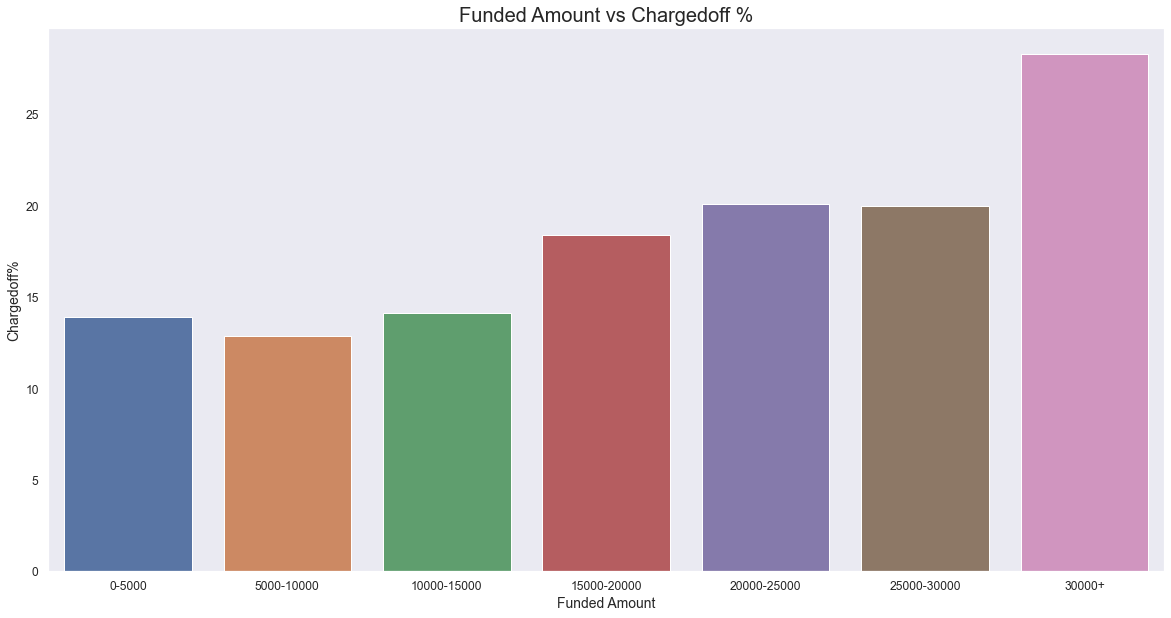

loan_status,funded_amnt_bins,Charged Off,Current,Fully Paid,Charged_off%
0,0-5000,1307,95,8076,13.929447
1,5000-10000,1624,159,11017,12.847085
2,10000-15000,1065,297,6464,14.145305
3,15000-20000,742,238,3291,18.398215
4,20000-25000,438,157,1739,20.119430
5,25000-30000,109,54,437,19.963370
6,30000+,130,57,329,28.322440


In [199]:
fa_grd_category_pivot=pd.pivot_table(data=loan_df,index="funded_amnt_bins",columns="loan_status", values="count", aggfunc=sum)
fa_grd_category_pivot.reset_index(inplace=True)
fa_grd_category_pivot["Charged_off%"]=fa_grd_category_pivot["Charged Off"]*100/(fa_grd_category_pivot['Charged Off']+ fa_grd_category_pivot['Fully Paid']) 

plt.figure(figsize=(12,8),facecolor='b')
sns.set_style("dark")

fig, ax1 = plt.subplots(figsize=(20, 10))
ax1.set_title('Funded Amount vs Chargedoff %',fontsize=20)
ax1=sns.barplot(x='funded_amnt_bins', y='Charged_off%', data=fa_grd_category_pivot)
ax1.set_ylabel('Chargedoff%',fontsize=14)
ax1.set_xlabel('Funded Amount',fontsize=14)
plt.show()
fa_grd_category_pivot

# Max Charged Off is in 30k to 35k funded amount

### Public Bankrupties vs Charged Off

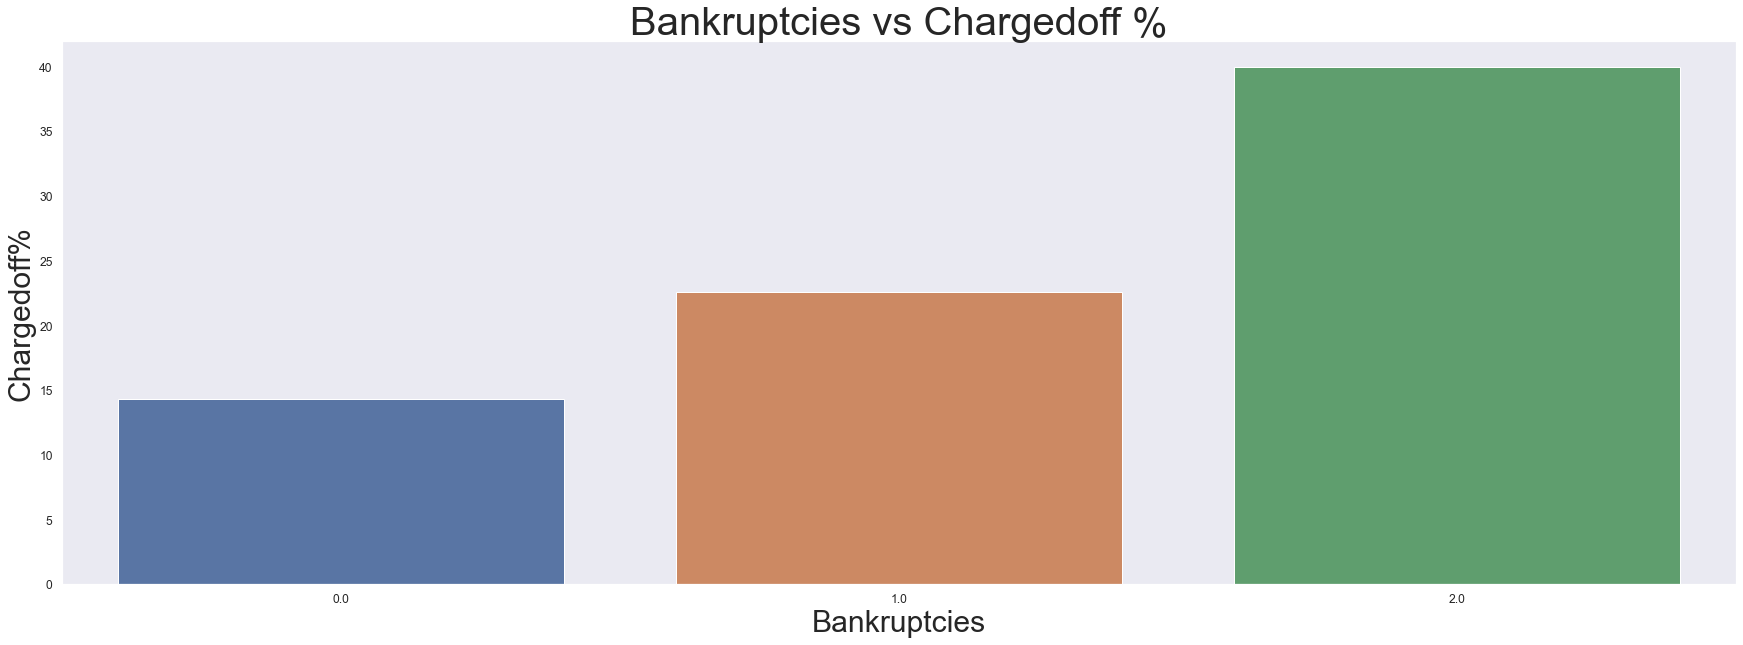

loan_status,pub_rec_bankruptcies,Charged Off,Current,Fully Paid,Charged_off%
0,0.0,4939,1021,29562,14.315527
1,1.0,361,35,1240,22.548407
2,2.0,2,1,3,40.000000


In [200]:
dlq_category_pivot=pd.pivot_table(data=loan_df,index="pub_rec_bankruptcies",columns="loan_status", values="count", aggfunc=np.sum)
dlq_category_pivot.reset_index(inplace=True)
dlq_category_pivot["Charged_off%"]=dlq_category_pivot["Charged Off"]*100/(dlq_category_pivot['Charged Off']+ dlq_category_pivot['Fully Paid']) 

fig, ax1 = plt.subplots(figsize=(30, 10))
ax1.set_title('Bankruptcies vs Chargedoff %',fontsize=40)
ax1=sns.barplot(x='pub_rec_bankruptcies', y='Charged_off%', data=dlq_category_pivot)
ax1.set_ylabel('Chargedoff%',fontsize=30)
ax1.set_xlabel('Bankruptcies',fontsize=30)
plt.show()
dlq_category_pivot

# 2 pub_rec_bankruptcies have chances of charged  off


### Revol_Util vs Charged Off

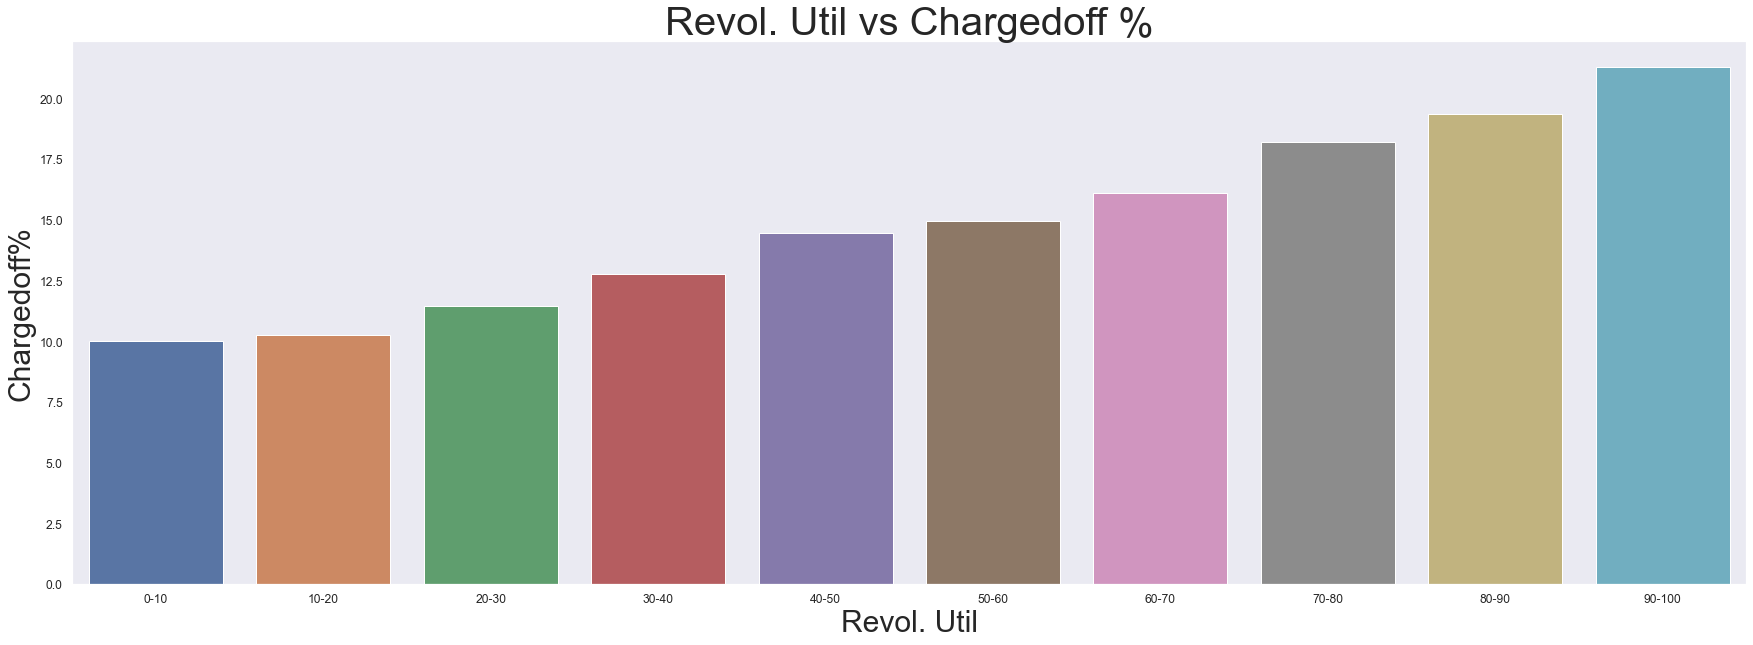

loan_status,revol_util_bins,Charged Off,Current,Fully Paid,Charged_off%
0,0-10,421,82,3774,10.035757
1,10-20,325,68,2845,10.252366
2,20-30,408,97,3158,11.441391
3,30-40,492,109,3355,12.789186
4,40-50,585,114,3456,14.476615
5,50-60,602,123,3419,14.971400
6,60-70,633,140,3296,16.110970
7,70-80,675,123,3034,18.198975
8,80-90,657,117,2738,19.351988
9,90-100,617,84,2278,21.312608


In [202]:
ru_category_pivot=pd.pivot_table(data=loan_df,index="revol_util_bins",columns="loan_status", values="count", aggfunc=np.sum)
ru_category_pivot.reset_index(inplace=True)
ru_category_pivot["Charged_off%"]=ru_category_pivot["Charged Off"]*100/(ru_category_pivot['Charged Off']+ ru_category_pivot['Fully Paid']) 

fig, ax1 = plt.subplots(figsize=(30, 10))
ax1.set_title('Revol. Util vs Chargedoff %',fontsize=40)
ax1=sns.barplot(x='revol_util_bins', y='Charged_off%', data=ru_category_pivot)
ax1.set_ylabel('Chargedoff%',fontsize=30)
ax1.set_xlabel('Revol. Util',fontsize=30)
plt.show()
ru_category_pivot

# charge off continuously increase with higher revol_util